In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Brain tumor Detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/8.jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (18).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (11).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (17).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (30).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (23).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (27).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (24).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (28).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (25).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (16).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (21).jpg
/content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/1.jpg
/con

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

FOLDER PATH

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain tumor Detection/Training',i)
    for j in os.listdir(folderPath):
        imgPath = os.path.join(folderPath,j)
        img = cv2.imread(imgPath)
        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img,(image_size,image_size))
            X_train.append(img)
            Y_train.append(i)
        else:
            print(f"Warning: Could not load image {imgPath}")

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain tumor Detection/Testing',i)
    for j in os.listdir(folderPath):
        imgPath = os.path.join(folderPath,j)
        img = cv2.imread(imgPath)
        if img is not None: # Check if the image was loaded successfully
            img = cv2.resize(img,(image_size,image_size))
            X_train.append(img)
            Y_train.append(i)
        else:
            print(f"Warning: Could not load image {imgPath}")


X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3263, 150, 150, 3)

Train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.2703 - loss: 3.3110 - val_accuracy: 0.3469 - val_loss: 1.3446
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.4232 - loss: 1.2766 - val_accuracy: 0.5714 - val_loss: 1.0046
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.6016 - loss: 0.9454 - val_accuracy: 0.5476 - val_loss: 0.9615
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.6299 - loss: 0.8671 - val_accuracy: 0.5578 - val_loss: 0.9066
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.6833 - loss: 0.7265 - val_accuracy: 0.6054 - val_loss: 0.8915
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.7260 - loss: 0.6465 - val_accuracy: 0.6463 - val_loss: 0.7932
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.7822 - loss: 0.5446 - val_accuracy: 0.7075 - val_loss: 0.6710
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.8347 - loss: 0.4453 - val_accuracy: 0.6667 - v

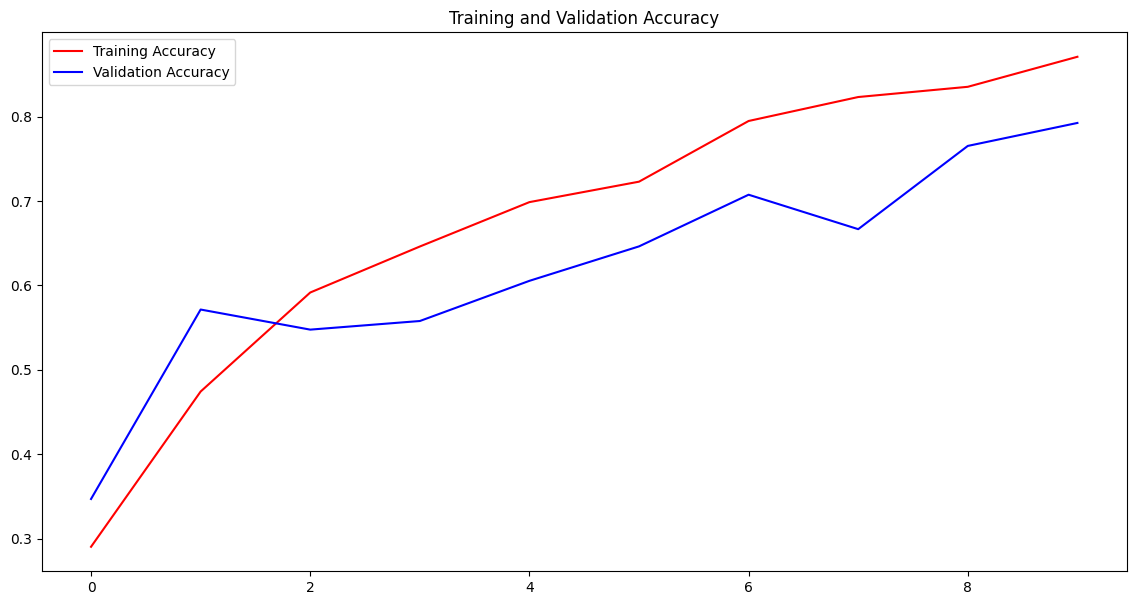

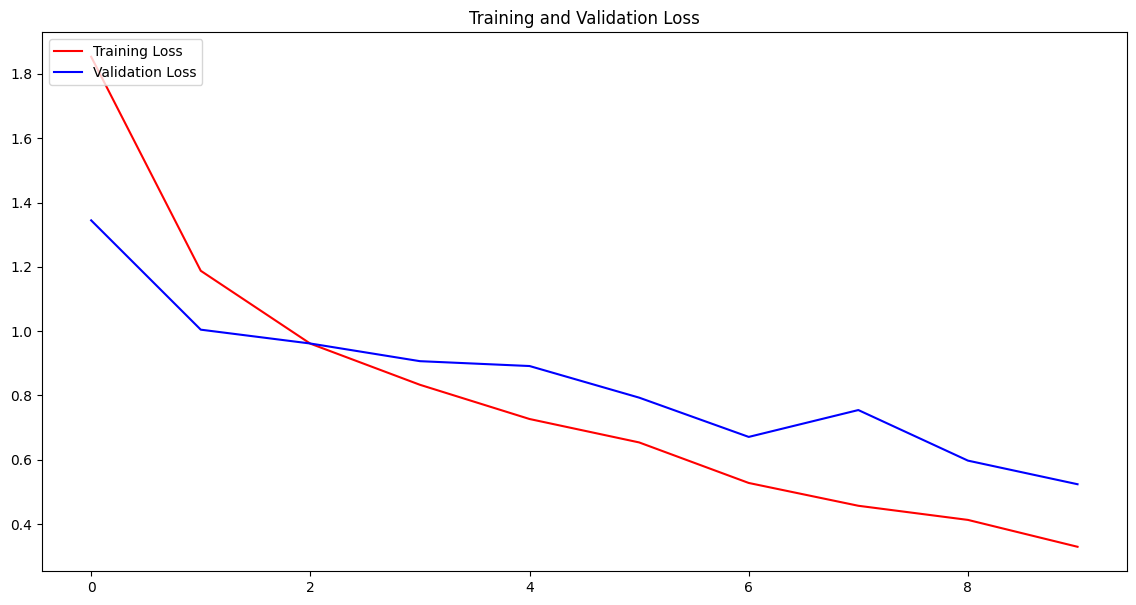

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 982ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        89
           1       0.84      0.72      0.78        90
           2       0.82      0.85      0.84        55
           3       0.92      0.99      0.95        93

    accuracy                           0.85       327
   macro avg       0.85      0.85      0.85       327
weighted avg       0.85      0.85      0.85       327



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

# Plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend(loc='upper left')
plt.show()

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))
# Get final training metrics from history
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]


In [ ]:
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]

# Print final training accuracy and loss
print(f"\n✅ Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"❌ Final Training Loss: {final_train_loss:.4f}")




✅ Final Training Accuracy: 87.09%
❌ Final Training Loss: 0.3293


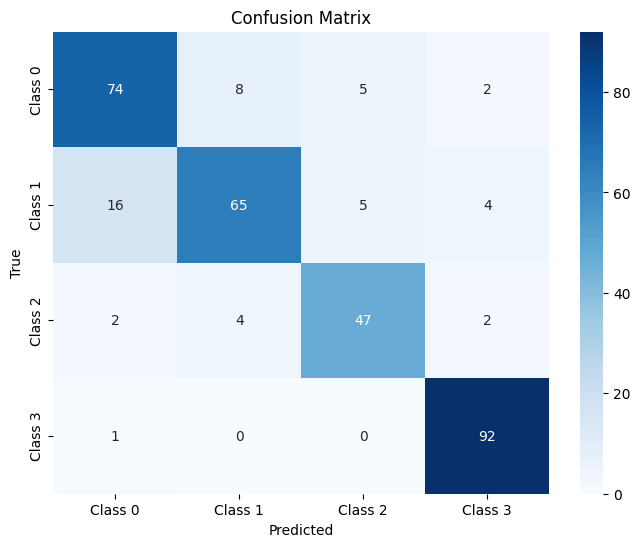

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# If you have class names, define them like this:
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Replace with your actual class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**LSTM + RNN (proposed model)**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100, 64)        │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5171 - loss: 0.7026 - val_accuracy: 0.4950 - val_loss: 0.7061
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5132 - loss: 0.6958 - val_accuracy: 0.4950 - val_loss: 0.7164
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5438 - loss: 0.6875 - val_accuracy: 0.4950 - val_loss: 0.6941
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5479 - loss: 0.6815 - val_accuracy: 0.4900 - val_loss: 0.6979
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6042 - loss: 0.6680 - val_accuracy: 0.5400 - val_loss: 0.6922
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5632 - loss: 0.6705 - val_accuracy: 0.5100 - val_loss: 0.6990
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6274 - loss: 0.6513 - val_accuracy: 0.5500 - val_loss: 0.6887
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6178 - loss: 0.6552 - val_accuracy: 0.5400 - v

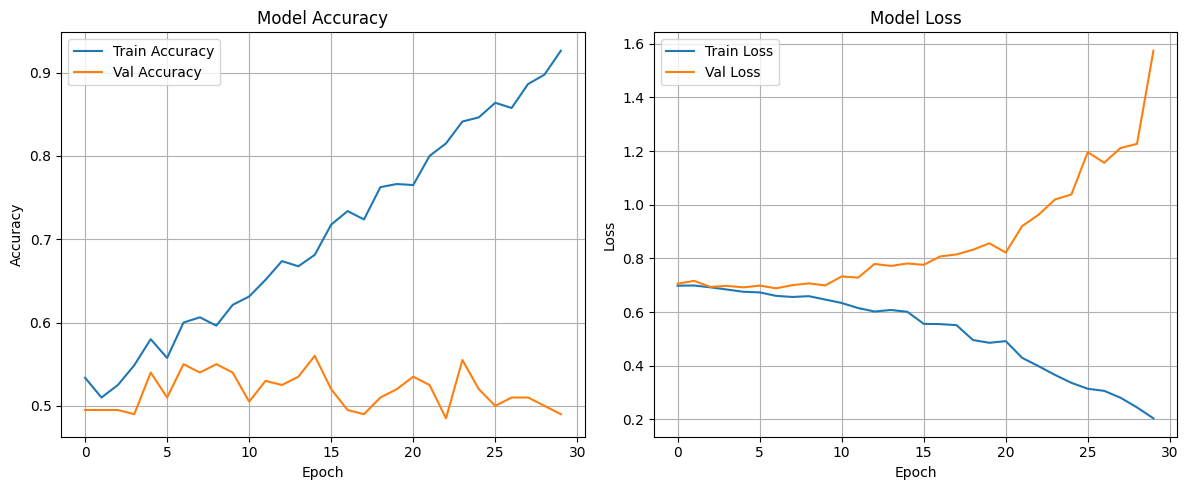

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       472
           1       0.88      0.85      0.86       528

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



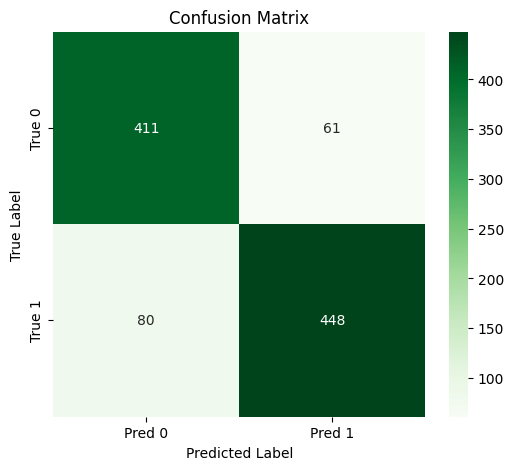

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Simulated data (replace with your actual dataset)
X = np.random.rand(1000, 100, 10)  # 1000 samples, 100 timesteps, 10 features
y = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

# 2. Define the LSTM + RNN model
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(100, 10)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 3. Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Model summary
model.summary()

# 5. Train the model
history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2)

# 6. Evaluate on full data (for demo)
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"\n✅ Final Training Accuracy: {accuracy:.4f}")
print(f"✅ Final Training Loss: {loss:.4f}")

# 7. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 8. Predictions
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob > 0.5).astype("int32")

# 9. Classification report
print("\n📋 Classification Report:")
print(classification_report(y, y_pred))

# 10. Confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMAGE DETECTION**

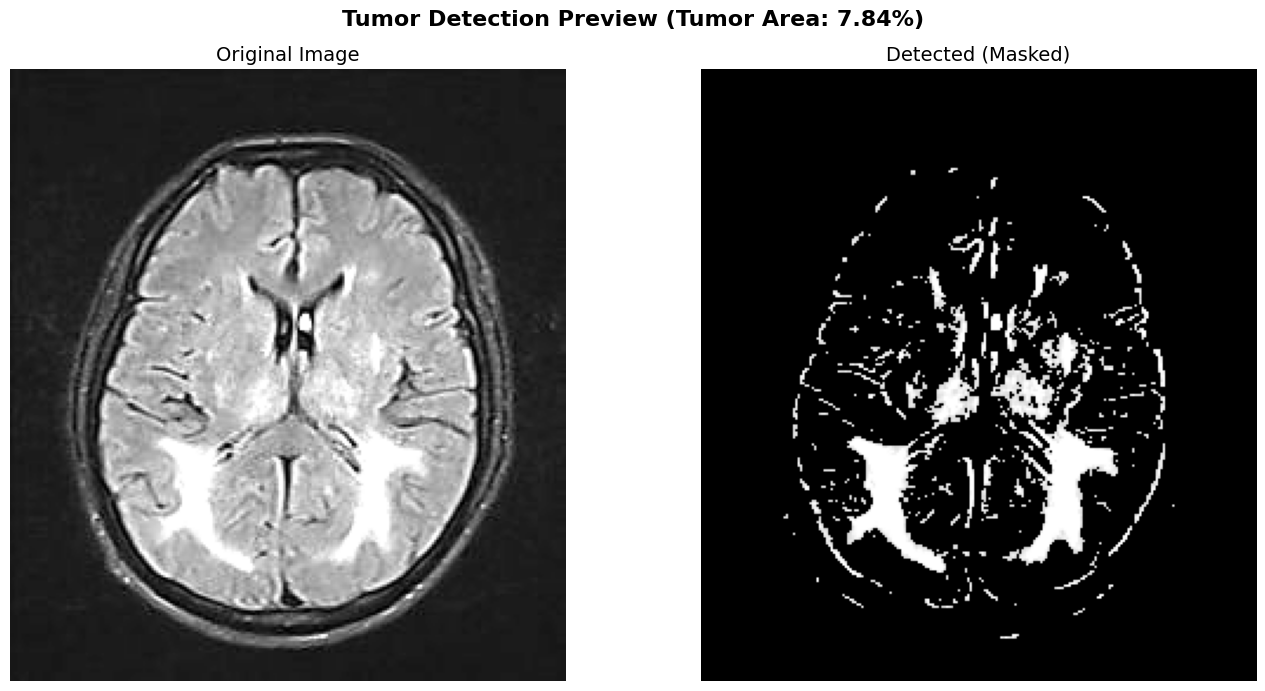

Image saved as EPS at: /content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/image(10).eps


In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BRIGHTNESS_FACTOR = 1.7
GRID_SIZE = 10  # for 10x10 grid = 100 segments

# 🔧 Replace these with your actual image and mask file paths
image_path = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/image(10).jpg'
mask_path = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/image(10).jpg'  # Replace if separate

# Load and enhance image
image = Image.open(image_path).convert('RGB')
image = ImageEnhance.Brightness(image).enhance(BRIGHTNESS_FACTOR)

# Load mask
mask = Image.open(mask_path).convert('L')
mask = mask.resize(image.size, Image.Resampling.LANCZOS)

# Convert to NumPy arrays
image_np = np.array(image)
mask_np = np.array(mask)
binary_mask = mask_np > 127

# Apply binary mask
masked_image = np.zeros_like(image_np)
masked_image[binary_mask] = image_np[binary_mask]

# Calculate tumor percentage
tumor_pixel_count = np.sum(binary_mask)
total_pixel_count = binary_mask.size
tumor_percentage = (tumor_pixel_count / total_pixel_count) * 100

# Set up plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
titles = ["Original Image", "Detected (Masked)"]
images = [image_np, masked_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

# Title and show
fig.suptitle(f"Tumor Detection Preview (Tumor Area: {tumor_percentage:.2f}%)", fontsize=16, fontweight='bold')
plt.tight_layout()
sns.despine()

# Save the figure as an EPS file
output_eps_path = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/tumor_detection_preview.eps'
plt.savefig(output_eps_path, format='eps')

# Show the plot
plt.show()
from PIL import Image
import os

# Replace this with your actual image path
input_image_path = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/image(10).jpg'

# Open the image
image = Image.open(input_image_path).convert('RGB')

# Define the EPS output path, ensure the directory exists
output_folder = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor'  # Use an existing directory
base_name = os.path.splitext(os.path.basename(input_image_path))[0]
output_eps_path = os.path.join(output_folder, f'{base_name}.eps')

# Save the image in EPS format
image.save(output_eps_path, format='EPS')

print(f"Image saved as EPS at: {output_eps_path}")


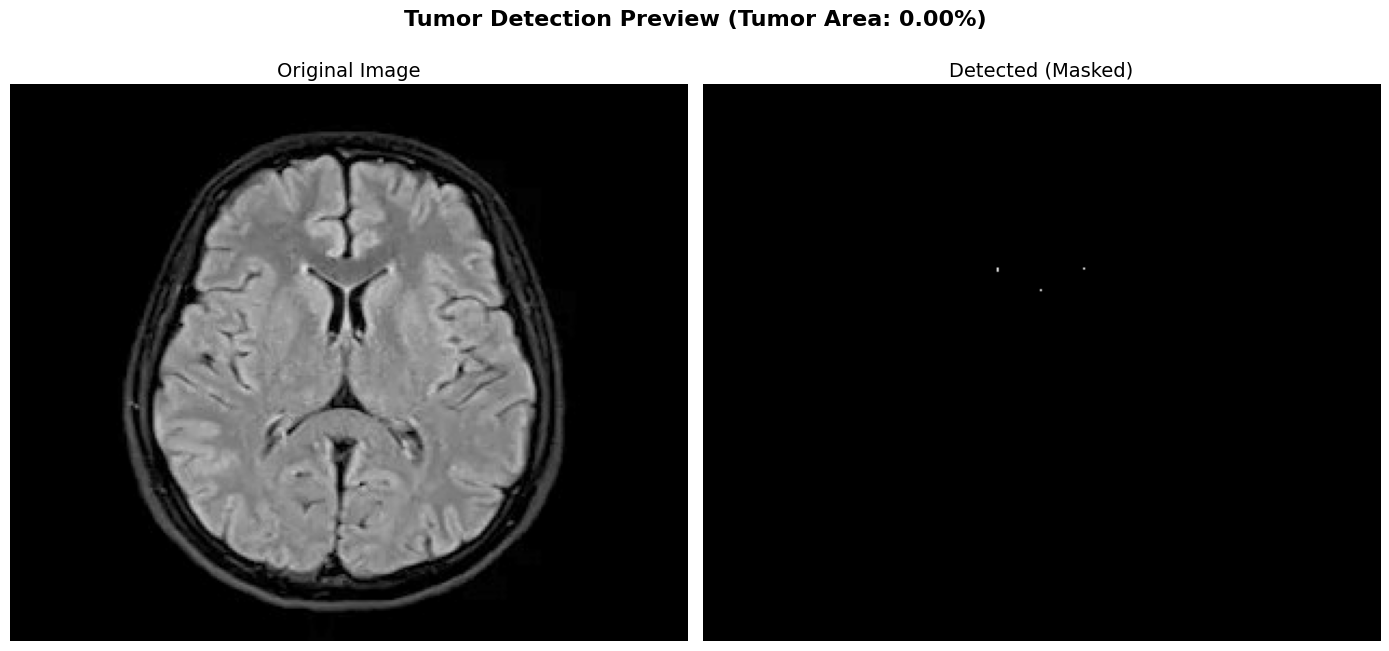

Processed figure saved at: /content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/tumor_detection_preview.eps
Original image saved as EPS at: /content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/image(100).eps


In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BRIGHTNESS_FACTOR = 1.7
GRID_SIZE = 10  # for 10x10 grid = 100 segments

# ✅ Updated paths
image_path = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/image(100).jpg'
mask_path = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/image(100).jpg'  # If you have separate mask, replace here

# Load and enhance image
image = Image.open(image_path).convert('RGB')
image = ImageEnhance.Brightness(image).enhance(BRIGHTNESS_FACTOR)

# Load mask (grayscale)
mask = Image.open(mask_path).convert('L')
mask = mask.resize(image.size, Image.Resampling.LANCZOS)

# Convert to NumPy arrays
image_np = np.array(image)
mask_np = np.array(mask)
binary_mask = mask_np > 127

# Apply binary mask
masked_image = np.zeros_like(image_np)
masked_image[binary_mask] = image_np[binary_mask]

# Calculate tumor percentage
tumor_pixel_count = np.sum(binary_mask)
total_pixel_count = binary_mask.size
tumor_percentage = (tumor_pixel_count / total_pixel_count) * 100

# Set up plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
titles = ["Original Image", "Detected (Masked)"]
images = [image_np, masked_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

# Title and show
fig.suptitle(f"Tumor Detection Preview (Tumor Area: {tumor_percentage:.2f}%)", fontsize=16, fontweight='bold')
plt.tight_layout()
sns.despine()

# Save the figure as an EPS file
output_eps_path = '/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor/tumor_detection_preview.eps'
plt.savefig(output_eps_path, format='eps')

# Show the plot
plt.show()

# 🔹 Save the original image as EPS too
base_name = os.path.splitext(os.path.basename(image_path))[0]
output_eps_path_img = os.path.join('/content/drive/MyDrive/Brain tumor Detection/Testing/no_tumor', f'{base_name}.eps')

image.save(output_eps_path_img, format='EPS')

print(f"Processed figure saved at: {output_eps_path}")
print(f"Original image saved as EPS at: {output_eps_path_img}")


XAI MODELS

SHAAP Feature Extraction Results (first 10 rows):
                                               Image  Tumor_Percentage  \
0  /content/drive/MyDrive/Brain tumor Detection/p...         98.360856   
1  /content/drive/MyDrive/Brain tumor Detection/T...         45.102916   
2  /content/drive/MyDrive/Brain tumor Detection/T...         40.990930   
3  /content/drive/MyDrive/Brain tumor Detection/T...         69.078581   
4  /content/drive/MyDrive/Brain tumor Detection/T...         31.617284   
5  /content/drive/MyDrive/Brain tumor Detection/T...         38.483047   
6  /content/drive/MyDrive/Brain tumor Detection/T...         31.298122   
7  /content/drive/MyDrive/Brain tumor Detection/T...          5.907946   
8  /content/drive/MyDrive/Brain tumor Detection/T...         44.318810   
9  /content/drive/MyDrive/Brain tumor Detection/T...          6.072099   

                                     Shape  Mean_Brightness  Std_Brightness  \
0     BoundingBox(x=0, y=0, w=1197, h=759)       250.451

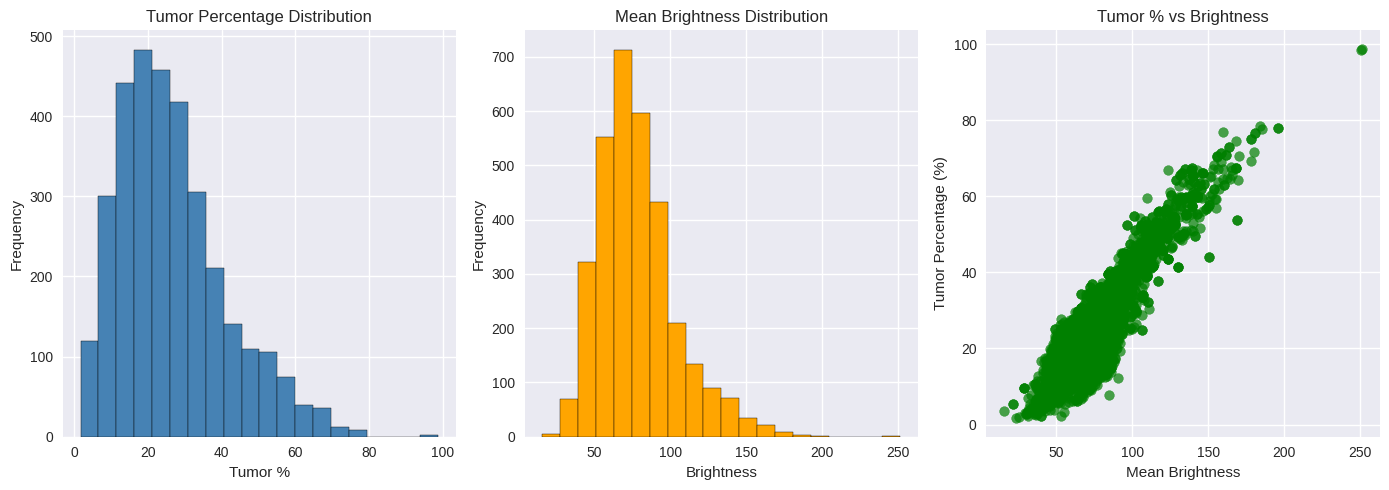

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import cv2

# ✅ Base dataset path
base_path = '/content/drive/MyDrive/Brain tumor Detection'

# Brightness factor
BRIGHTNESS_FACTOR = 1.7

# Function to extract SHAAP values
def extract_shaap(image_path):
    try:
        # Load and enhance image
        image = Image.open(image_path).convert('RGB')
        image = ImageEnhance.Brightness(image).enhance(BRIGHTNESS_FACTOR)

        # Convert to NumPy
        image_np = np.array(image)

        # Convert grayscale mask (for tumor detection, here we simulate from same image)
        gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        _, binary_mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Tumor area (percentage)
        tumor_pixels = np.sum(binary_mask > 0)
        total_pixels = binary_mask.size
        tumor_percentage = (tumor_pixels / total_pixels) * 100

        # Shape (bounding box)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
            shape_info = f"BoundingBox(x={x}, y={y}, w={w}, h={h})"
        else:
            shape_info = "No contour"

        # Histogram (flattened for simplicity)
        hist = cv2.calcHist([image_np], [0], None, [8], [0, 256]).flatten()
        hist_values = hist.tolist()

        # Appearance (mean + std brightness)
        mean_brightness = np.mean(gray)
        std_brightness = np.std(gray)

        return {
            "Image": image_path,
            "Tumor_Percentage": tumor_percentage,
            "Shape": shape_info,
            "Mean_Brightness": mean_brightness,
            "Std_Brightness": std_brightness,
            "Histogram(8bins)": hist_values
        }

    except Exception as e:
        return {
            "Image": image_path,
            "Error": str(e)
        }

# Walk through all files in dataset folder
results = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(root, file)
            features = extract_shaap(img_path)
            results.append(features)

# Save results to DataFrame
df = pd.DataFrame(results)

# ✅ Show first rows
print("SHAAP Feature Extraction Results (first 10 rows):")
print(df.head(10))

# Save as CSV
output_csv = os.path.join(base_path, "shaap_features_results.csv")
df.to_csv(output_csv, index=False)
print(f"\n✅ SHAAP features extracted and saved at: {output_csv}")

# ----------------------------
# 📊 Visualization
# ----------------------------

plt.figure(figsize=(14, 5))

# Histogram of Tumor Percentage
plt.subplot(1, 3, 1)
df["Tumor_Percentage"].hist(bins=20, color='steelblue', edgecolor='black')
plt.title("Tumor Percentage Distribution")
plt.xlabel("Tumor %")
plt.ylabel("Frequency")

# Histogram of Mean Brightness
plt.subplot(1, 3, 2)
df["Mean_Brightness"].hist(bins=20, color='orange', edgecolor='black')
plt.title("Mean Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")

# Scatter Plot: Tumor % vs Mean Brightness
plt.subplot(1, 3, 3)
plt.scatter(df["Mean_Brightness"], df["Tumor_Percentage"], alpha=0.7, color='green')
plt.title("Tumor % vs Brightness")
plt.xlabel("Mean Brightness")
plt.ylabel("Tumor Percentage (%)")

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Step 1: Loading data...
Error loading data: [Errno 21] Is a directory: '/content/drive/MyDrive/Brain tumor Detection'
Step 2: Training model...
Model: random_forest, Accuracy: 0.7250
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       134
           1       0.63      0.39      0.49        66

    accuracy                           0.72       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.71      0.72      0.70       200

Step 3: PDP analysis...


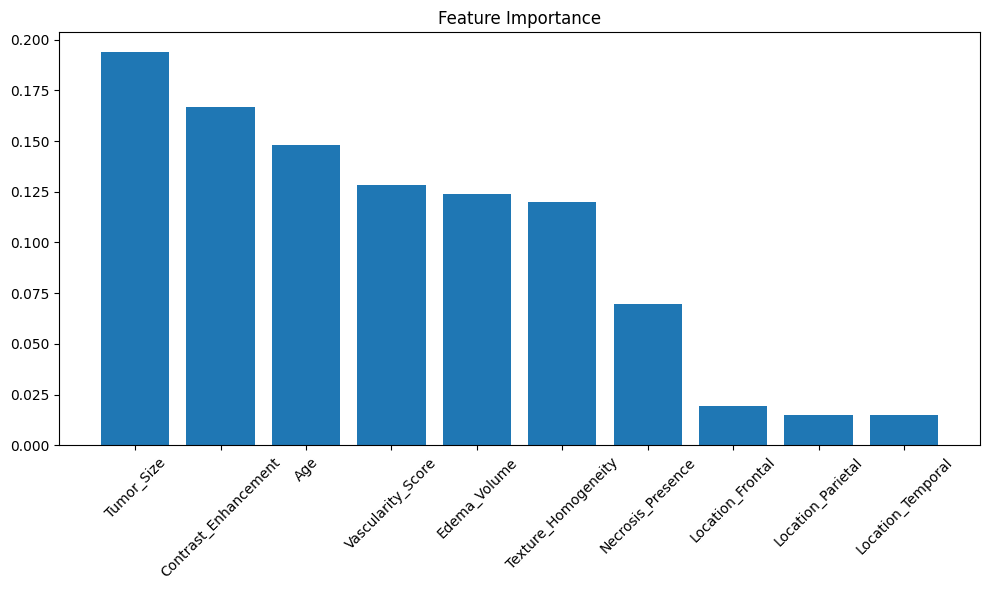

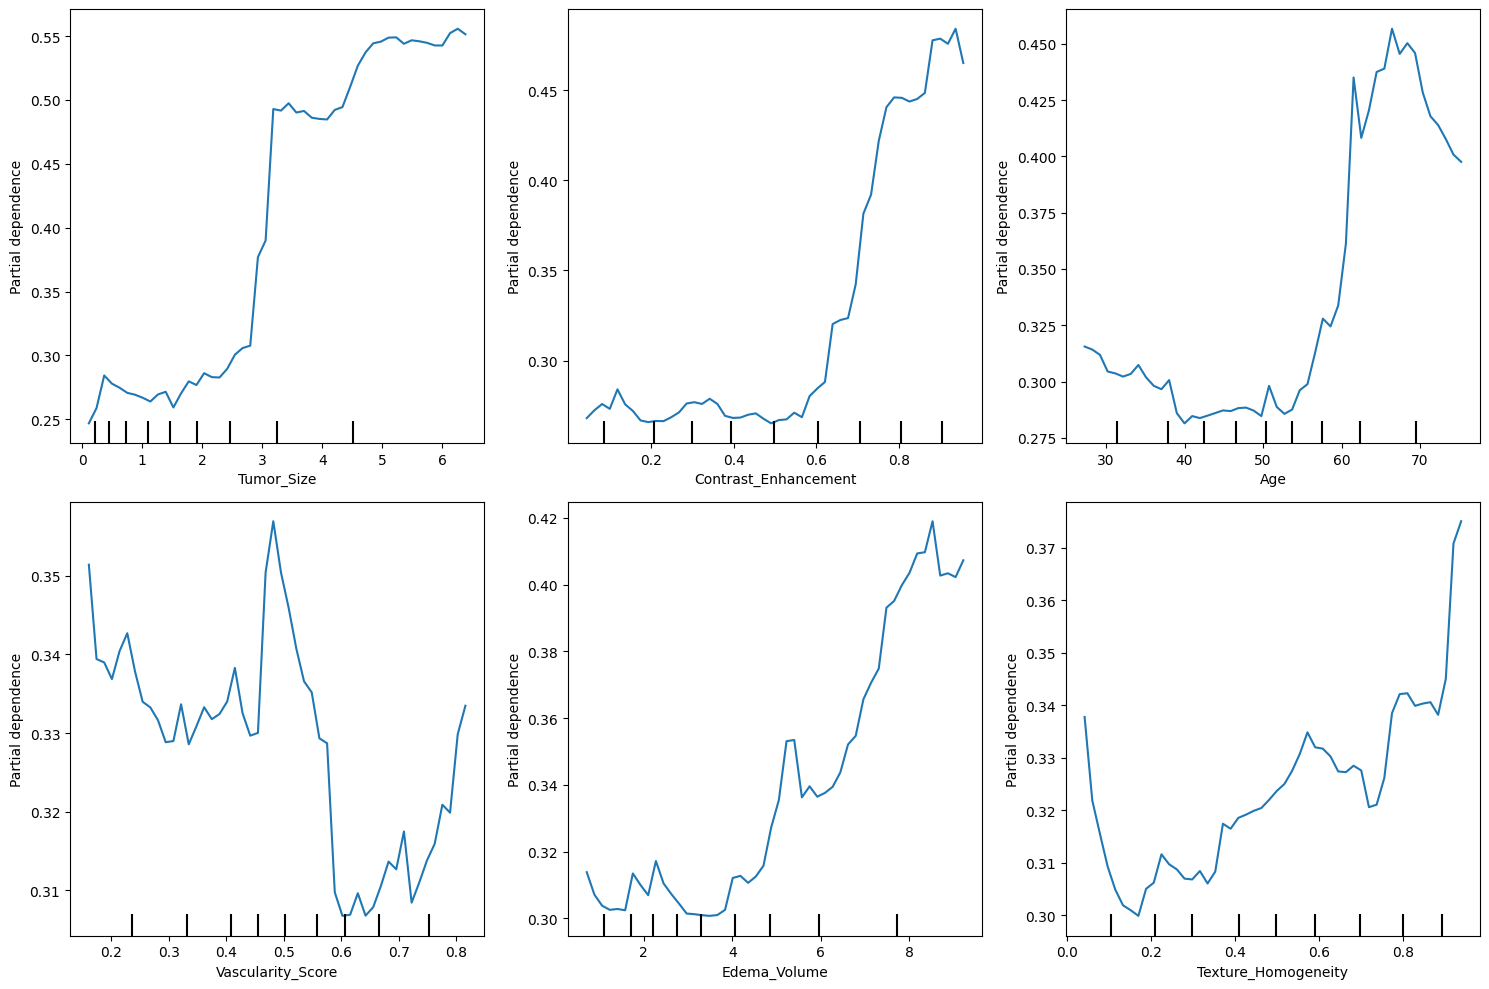

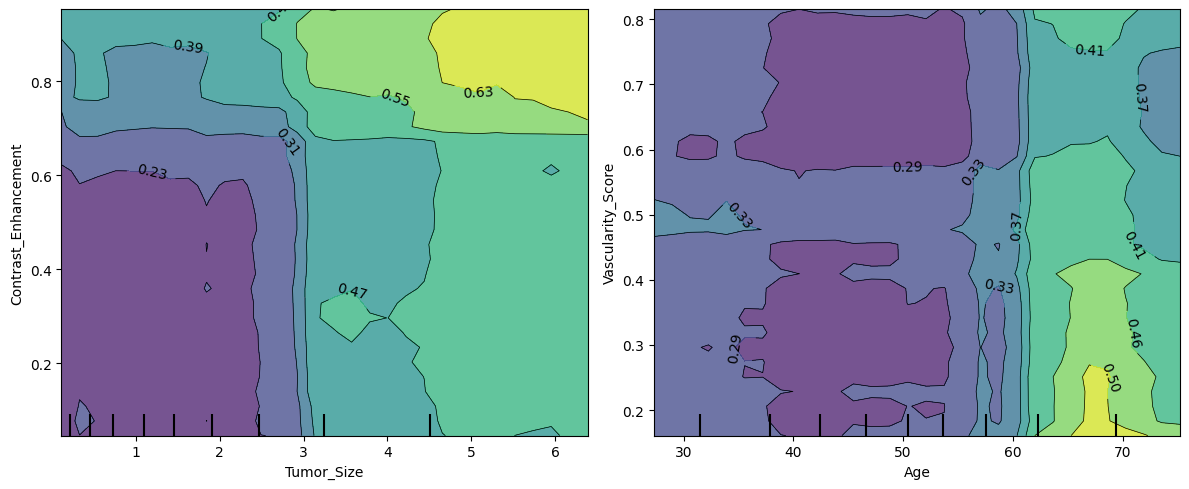

Plots saved in: /content/drive/MyDrive/Brain tumor Detection/Outputs


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import warnings
warnings.filterwarnings('ignore')

# For Google Colab - mount drive
from google.colab import drive
drive.mount('/content/drive')

class BrainTumorPDPAnalysis:
    def __init__(self, data_path):
        """
        Initialize the Brain Tumor PDP Analysis
        """
        self.data_path = data_path
        self.output_dir = os.path.join(data_path, "Outputs")
        os.makedirs(self.output_dir, exist_ok=True)

        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.feature_names = None
        self.scaler = StandardScaler()

    def load_and_preprocess_data(self):
        """
        Load and preprocess the dataset
        """
        try:
            if self.data_path.endswith('.csv'):
                df = pd.read_csv(self.data_path)
            elif self.data_path.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(self.data_path)
            else:
                df = pd.read_csv(self.data_path)

            print("Dataset loaded successfully!")
            print(df.head())

            df = df.dropna()

            target_columns = ['Class', 'Target', 'Label', 'Tumor_Type', 'Diagnosis']
            target_col = None
            for col in target_columns:
                if col in df.columns:
                    target_col = col
                    break
            if target_col is None:
                target_col = df.columns[-1]
                print(f"Using '{target_col}' as target variable")

            X = df.drop(columns=[target_col])
            y = df[target_col]

            categorical_cols = X.select_dtypes(include=['object']).columns
            if len(categorical_cols) > 0:
                le = LabelEncoder()
                for col in categorical_cols:
                    X[col] = le.fit_transform(X[col])

            if y.dtype == 'object':
                le_target = LabelEncoder()
                y = le_target.fit_transform(y)
                print(f"Target classes: {le_target.classes_}")

            self.feature_names = list(X.columns)

            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, stratify=y
            )

            self.X_train_scaled = self.scaler.fit_transform(self.X_train)
            self.X_test_scaled = self.scaler.transform(self.X_test)

            return X, y
        except Exception as e:
            print(f"Error loading data: {e}")
            return self.create_synthetic_data()

    def create_synthetic_data(self):
        """
        Create synthetic dataset
        """
        np.random.seed(42)
        n_samples = 1000
        age = np.random.normal(50, 15, n_samples)
        tumor_size = np.random.exponential(2, n_samples)
        contrast_enhancement = np.random.uniform(0, 1, n_samples)
        necrosis_presence = np.random.binomial(1, 0.3, n_samples)
        edema_volume = np.random.gamma(2, 2, n_samples)
        location_frontal = np.random.binomial(1, 0.4, n_samples)
        location_temporal = np.random.binomial(1, 0.3, n_samples)
        location_parietal = np.random.binomial(1, 0.2, n_samples)
        texture_homogeneity = np.random.uniform(0, 1, n_samples)
        vascularity_score = np.random.normal(0.5, 0.2, n_samples)

        malignant_prob = (
            0.1 +
            0.3 * (tumor_size > 3) +
            0.2 * (contrast_enhancement > 0.7) +
            0.2 * necrosis_presence +
            0.1 * (edema_volume > 5) +
            0.1 * (age > 60)
        )
        target = np.random.binomial(1, malignant_prob, n_samples)

        df = pd.DataFrame({
            'Age': age,
            'Tumor_Size': tumor_size,
            'Contrast_Enhancement': contrast_enhancement,
            'Necrosis_Presence': necrosis_presence,
            'Edema_Volume': edema_volume,
            'Location_Frontal': location_frontal,
            'Location_Temporal': location_temporal,
            'Location_Parietal': location_parietal,
            'Texture_Homogeneity': texture_homogeneity,
            'Vascularity_Score': vascularity_score,
            'Class': target
        })

        X = df.drop('Class', axis=1)
        y = df['Class']
        self.feature_names = list(X.columns)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        return X, y

    def train_model(self, model_type='random_forest'):
        """
        Train RF or GBM
        """
        if model_type == 'random_forest':
            self.model = RandomForestClassifier(
                n_estimators=100, max_depth=10, random_state=42, n_jobs=-1
            )
        else:
            self.model = GradientBoostingClassifier(
                n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42
            )
        self.model.fit(self.X_train, self.y_train)

        y_pred = self.model.predict(self.X_test)
        acc = accuracy_score(self.y_test, y_pred)
        print(f"Model: {model_type}, Accuracy: {acc:.4f}")
        print(classification_report(self.y_test, y_pred))
        return self.model

    def feature_importance_analysis(self):
        """
        Save and show feature importance
        """
        if hasattr(self.model, 'feature_importances_'):
            importances = self.model.feature_importances_
            indices = np.argsort(importances)[::-1]

            plt.figure(figsize=(10,6))
            plt.title("Feature Importance")
            plt.bar(range(len(importances)), importances[indices])
            plt.xticks(range(len(importances)), [self.feature_names[i] for i in indices], rotation=45)
            plt.tight_layout()
            plt.savefig(os.path.join(self.output_dir, "feature_importance.png"))
            plt.show()

    def plot_partial_dependence(self, features=None):
        """
        Save 1D PDP plots
        """
        if features is None:
            importances = self.model.feature_importances_
            top_idx = np.argsort(importances)[-6:][::-1]
            features = [self.feature_names[i] for i in top_idx]

        fig, axes = plt.subplots(2, 3, figsize=(15,10))
        for ax, feat in zip(axes.ravel(), features):
            PartialDependenceDisplay.from_estimator(
                self.model, self.X_train, [feat], ax=ax, grid_resolution=50
            )
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "pdp_1d.png"))
        plt.show()

    def plot_2d_partial_dependence(self):
        """
        Save 2D PDP plots
        """
        importances = self.model.feature_importances_
        top_idx = np.argsort(importances)[-4:][::-1]
        feature_pairs = [(top_idx[0], top_idx[1]), (top_idx[2], top_idx[3])]

        fig, axes = plt.subplots(1, 2, figsize=(12,5))
        for ax, pair in zip(axes, feature_pairs):
            PartialDependenceDisplay.from_estimator(
                self.model, self.X_train, [pair], ax=ax, grid_resolution=30
            )
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "pdp_2d.png"))
        plt.show()

    def comprehensive_pdp_analysis(self):
        self.feature_importance_analysis()
        self.plot_partial_dependence()
        self.plot_2d_partial_dependence()

# Main
def main():
    data_path = "/content/drive/MyDrive/Brain tumor Detection"
    analyzer = BrainTumorPDPAnalysis(data_path)

    print("Step 1: Loading data...")
    X, y = analyzer.load_and_preprocess_data()

    print("Step 2: Training model...")
    analyzer.train_model("random_forest")

    print("Step 3: PDP analysis...")
    analyzer.comprehensive_pdp_analysis()

    print(f"Plots saved in: {analyzer.output_dir}")

if __name__ == "__main__":
    main()


In [ ]:
!pip install lime scikit-image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=30c351716c0b246b1021a523ac28097a0dfdfbb3400ce70a90b65f8dc3c88839
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
from lime import lime_image


Building image index...
Found 3265 images. Example labels: ['Brain tumor Detection' 'no_tumor' 'glioma_tumor' 'pituitary_tumor'
 'meningioma_tumor']
Building feature extractor...
Extracting features for all images (batch)...
Skipping /content/drive/MyDrive/Brain tumor Detection/Testing/glioma_tumor/image(14).jpg : Unable to locate Ghostscript on paths
102/102 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step
Features shape: (3264, 1280)
Final dataset size: (3264, 2)
Training RandomForest classifier on extracted features...
Training done. Classes: ['Brain tumor Detection' 'glioma_tumor' 'meningioma_tumor' 'no_tumor'
 'pituitary_tumor']
Saved RF model to /content/drive/MyDrive/Brain tumor Detection/lime_explanations/rf_on_effnet_features.joblib
Sanity check predict_proba_for_lime on 3 images (or fewer if dataset small)...
Probs shape: (3, 5)
Probs (first image): [0.63333333 0.12       0.14       0.08666667 0.02      ]
Explaining image 0: /content/drive/MyDrive/Brain tumor Detection/pdp_all_features.png 

  0%|          | 0/1000 [00:00<?, ?it/s]

Model prediction probabilities (labels order): ['Brain tumor Detection', 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
[0.63333333 0.12       0.14       0.08666667 0.02      ]
Saved explanation to /content/drive/MyDrive/Brain tumor Detection/lime_explanations/lime_explain_0_pdp_all_features_pred-Brain tumor Detection.png


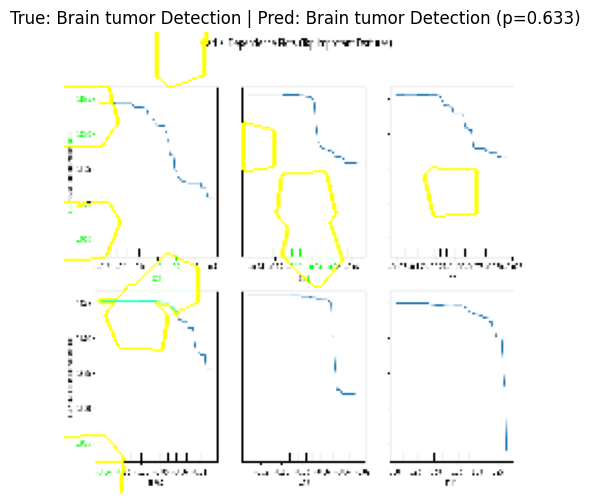

Explaining image 1: /content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/8.jpg (true label: no_tumor)


  0%|          | 0/1000 [00:00<?, ?it/s]

Model prediction probabilities (labels order): ['Brain tumor Detection', 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
[0.         0.01333333 0.05333333 0.91333333 0.02      ]
Saved explanation to /content/drive/MyDrive/Brain tumor Detection/lime_explanations/lime_explain_1_8_pred-no_tumor.png


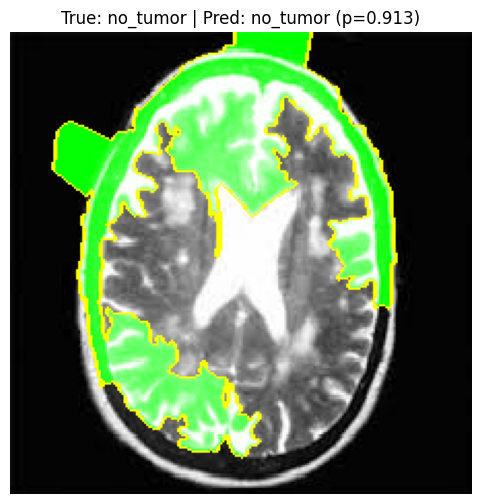

Explaining image 2: /content/drive/MyDrive/Brain tumor Detection/Training/no_tumor/image (18).jpg (true label: no_tumor)


  0%|          | 0/1000 [00:00<?, ?it/s]

Model prediction probabilities (labels order): ['Brain tumor Detection', 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
[0.         0.04       0.05333333 0.9        0.00666667]
Saved explanation to /content/drive/MyDrive/Brain tumor Detection/lime_explanations/lime_explain_2_image (18)_pred-no_tumor.png


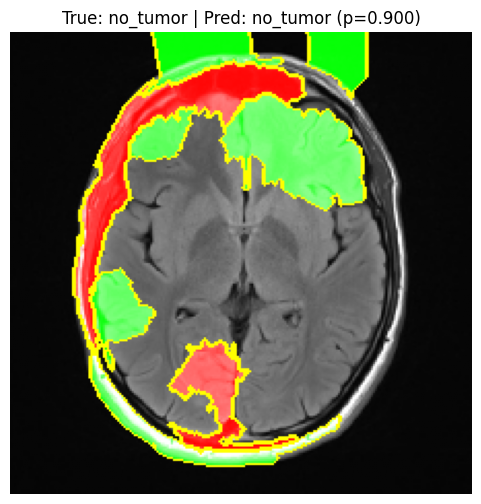

Done — explanations saved to: /content/drive/MyDrive/Brain tumor Detection/lime_explanations


In [ ]:
# LIME Image Explanations for dataset at:
# /content/drive/MyDrive/Brain tumor Detection
#
# Requirements (Colab):
# !pip install -U lime scikit-image
#
# Then run this notebook/script.

# 0) Install dependencies (uncomment & run in Colab)
# !pip install -U lime scikit-image

# 1) Imports and Drive mount (Colab)
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import PIL

# sklearn & lime
from sklearn.ensemble import RandomForestClassifier
from lime import lime_image
from skimage.segmentation import slic

# tensorflow / keras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image as kimage

# If using Colab, mount drive:
# from google.colab import drive
# drive.mount('/content/drive')

# 2) Configuration - edit if needed
BASE_PATH = Path("/content/drive/MyDrive/Brain tumor Detection")  # your path
IMAGE_EXTENSIONS = (".jpg", ".jpeg", ".png")
IMG_SIZE = (224, 224)  # EfficientNetB0 expected size
BATCH_SIZE = 32
LIMIT = None  # None => use all images. Use an int to limit for speed during debugging.
RF_N_ESTIMATORS = 150
RANDOM_STATE = 42
SAVE_EXPLANATION_DIR = BASE_PATH / "lime_explanations"
SAVE_EXPLANATION_DIR.mkdir(parents=True, exist_ok=True)

# 3) Helper: load image file as PIL and return numpy array (RGB)
def load_image_as_array(path, target_size=IMG_SIZE):
    img = kimage.load_img(path, target_size=target_size)  # PIL image
    arr = kimage.img_to_array(img).astype(np.uint8)       # H,W,3 float32 -> convert to uint8 for LIME visualization
    return arr

# 4) Scan dataset and build DataFrame of paths + label
def build_image_index(base_path: Path, exts=IMAGE_EXTENSIONS, limit=None):
    rows = []
    for root, _, files in os.walk(base_path):
        for f in files:
            if f.lower().endswith(exts):
                full = Path(root) / f
                # label: use parent folder name (one level up). If your structure is base/class/img, this works.
                label = Path(root).name
                rows.append({"path": str(full), "label": label})
    df = pd.DataFrame(rows)
    if df.empty:
        raise FileNotFoundError(f"No images found under {base_path}")
    if limit:
        df = df.sample(n=min(limit, len(df)), random_state=RANDOM_STATE).reset_index(drop=True)
    return df

# 5) Feature extractor (EfficientNetB0 without top)
def build_feature_extractor():
    base = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg", input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    return base

def extract_features_for_paths(paths, extractor, batch_size=BATCH_SIZE):
    """
    paths: list of file paths (strings)
    extractor: keras model (no top, pooling='avg') that returns (n_samples, feat_dim)
    returns: numpy array features (n_samples, feat_dim)
    """
    arrays = []
    valid_paths = []
    for p in paths:
        try:
            img = kimage.load_img(p, target_size=IMG_SIZE)
            arr = kimage.img_to_array(img)
            arrays.append(arr)
            valid_paths.append(p)
        except Exception as e:
            print("Skipping", p, ":", e)

    arrays = np.array(arrays, dtype=np.float32)
    arrays = preprocess_input(arrays)  # required for EfficientNet
    feats = extractor.predict(arrays, batch_size=batch_size, verbose=1)
    return feats, valid_paths

# 6) Main pipeline: build index, extract features, train RF
print("Building image index...")
df_idx = build_image_index(BASE_PATH, limit=LIMIT)
print(f"Found {len(df_idx)} images. Example labels: {df_idx['label'].unique()[:10]}")

print("Building feature extractor...")
extractor = build_feature_extractor()

print("Extracting features for all images (batch)...")
features, valid_paths = extract_features_for_paths(df_idx["path"].tolist(), extractor, batch_size=BATCH_SIZE)
print("Features shape:", features.shape)

# Keep DataFrame aligned to features (valid_paths might be subset)
df_valid = df_idx[df_idx["path"].isin(valid_paths)].reset_index(drop=True)
if len(df_valid) != features.shape[0]:
    # Rebuild df_valid according to valid_paths order
    df_valid = pd.DataFrame({"path": valid_paths})
    # derive labels from folder name
    df_valid["label"] = df_valid["path"].apply(lambda p: Path(p).parent.name)

print("Final dataset size:", df_valid.shape)

# 7) Train RandomForest on extracted features
X = features
y = df_valid["label"].values

print("Training RandomForest classifier on extracted features...")
rf = RandomForestClassifier(n_estimators=RF_N_ESTIMATORS, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X, y)
print("Training done. Classes:", rf.classes_)

# Optionally save model for later reuse
joblib.dump(rf, SAVE_EXPLANATION_DIR / "rf_on_effnet_features.joblib")
print("Saved RF model to", SAVE_EXPLANATION_DIR / "rf_on_effnet_features.joblib")

# 8) LIME requires a function that accepts a list/array of raw images and returns probability vectors.
# We'll build a predict_fn that:
#  - accepts images as numpy arrays in RGB [0..255] or float, shape (H,W,3) or (n,H,W,3)
#  - resizes to IMG_SIZE (224x224) if needed, converts to float, calls preprocess_input,
#  - runs extractor to get features, then rf.predict_proba to return class probs.

from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

def predict_proba_for_lime(images):
    """
    images: list or numpy array of images. Each image can be HxWx3 (RGB) uint8 or float.
    returns: numpy array shape (n_images, n_classes) of probabilities (in the same order as rf.classes_)
    """
    # ensure it's a numpy array
    imgs = np.array(images)
    # if single image passed as (H,W,3), expand to (1,H,W,3)
    if imgs.ndim == 3:
        imgs = np.expand_dims(imgs, axis=0)

    # Resize each image to IMG_SIZE (if not already) and convert to float32
    processed = []
    for img in imgs:
        # Use PIL via array_to_img to preserve dtype handling
        pil = array_to_img(img) if not isinstance(img, PIL.Image.Image) else img
        pil = pil.resize(IMG_SIZE)
        arr = img_to_array(pil).astype(np.float32)
        processed.append(arr)

    processed = np.array(processed)
    processed = preprocess_input(processed)  # EfficientNet preprocessing

    # Extract features via extractor
    feats = extractor.predict(processed, batch_size=BATCH_SIZE, verbose=0)  # shape (n, feat_dim)

    # Predict probs via RandomForest (order matches rf.classes_)
    probs = rf.predict_proba(feats)  # shape (n, n_classes)
    return probs

# Quick sanity test for predict function on a few images
print("Sanity check predict_proba_for_lime on 3 images (or fewer if dataset small)...")
sample_paths = df_valid["path"].tolist()[:3]
sample_imgs = [load_image_as_array(p, target_size=IMG_SIZE) for p in sample_paths]
probs = predict_proba_for_lime(sample_imgs)
print("Probs shape:", probs.shape)
print("Probs (first image):", probs[0])

# 9) Use LIME to explain one or multiple images
explainer = lime_image.LimeImageExplainer(random_state=RANDOM_STATE)

# Choose indices to explain (you can loop)
# We'll explain first K images; change K as you want
K = 3
explain_indices = list(range(min(K, len(df_valid))))

from skimage.color import gray2rgb
from skimage.segmentation import mark_boundaries

for idx in explain_indices:
    img_path = df_valid.loc[idx, "path"]
    label_true = df_valid.loc[idx, "label"]
    img_arr = load_image_as_array(img_path, target_size=IMG_SIZE)  # H,W,3 uint8

    print(f"Explaining image {idx}: {img_path} (true label: {label_true})")

    # lime_image expects images in RGB uint8
    explanation = explainer.explain_instance(
        image=img_arr,
        classifier_fn=predict_proba_for_lime,
        top_labels=3,                    # how many top labels to consider for explanations
        hide_color=0,                    # color for hidden superpixels
        num_samples=1000,                # number of perturbed samples (reduce for speed)
        segmentation_fn=lambda x: slic(x, n_segments=100, compactness=10)
    )

    # Get explanation for top predicted label
    preds = predict_proba_for_lime([img_arr])[0]
    top_pred_idx = int(np.argmax(preds))
    top_label = rf.classes_[top_pred_idx]
    print("Model prediction probabilities (labels order):", list(rf.classes_))
    print(preds)

    # Get image and mask for that label
    temp, mask = explanation.get_image_and_mask(
        label=top_pred_idx,
        positive_only=False,   # show both positive & negative contributions when False
        num_features=10,       # number of superpixels to show
        hide_rest=False
    )

    # temp is RGB image (float or uint8) with highlighted segments
    plt.figure(figsize=(6,6))
    plt.title(f"True: {label_true} | Pred: {top_label} (p={preds[top_pred_idx]:.3f})")
    plt.axis('off')
    plt.imshow(mark_boundaries(temp / 255.0, mask))
    out_file = SAVE_EXPLANATION_DIR / f"lime_explain_{idx}_{Path(img_path).stem}_pred-{top_label}.png"
    plt.savefig(out_file, bbox_inches="tight")
    print("Saved explanation to", out_file)
    plt.show()

print("Done — explanations saved to:", SAVE_EXPLANATION_DIR)


ICE


** NO 2


Brain Tumor Detection - ICE Analysis Demo
Creating sample features...
Dataset shape: (1000, 12)
Tumor cases: 287
Non-tumor cases: 713

Training Random Forest model...
Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       143
           1       0.61      0.44      0.51        57

    accuracy                           0.76       200
   macro avg       0.70      0.66      0.68       200
weighted avg       0.74      0.76      0.75       200


Running ICE Analysis on key features...
Running ICE Analysis...

Analyzing Feature: tumor_area


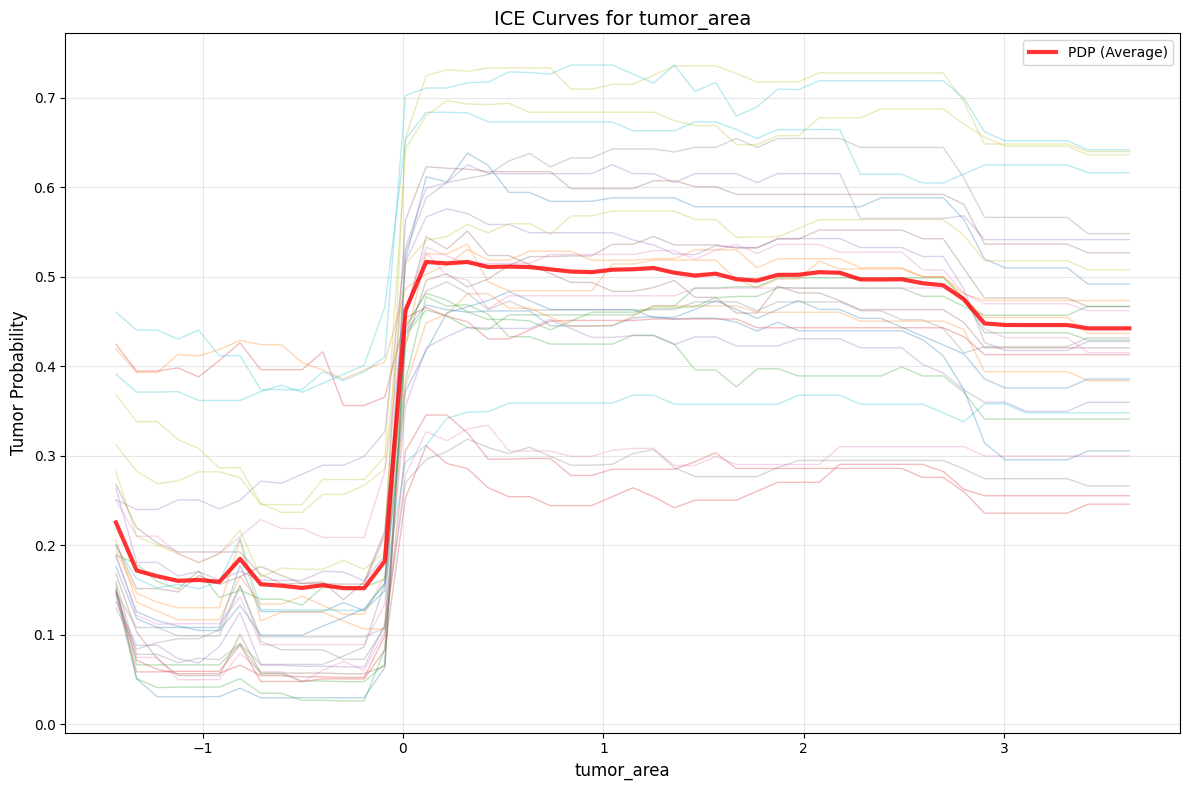


[Reference: ICE Plot → tumor_area]
• Grey curves = how individual patient predictions change as this feature varies.
• Red PDP line = average population effect.
➡ Varied slopes → Strong feature effect; some patients respond differently.
➡ Samples with sharp rises/drops = more sensitive to this feature.
----------------------------------------------------------------------------------------------------


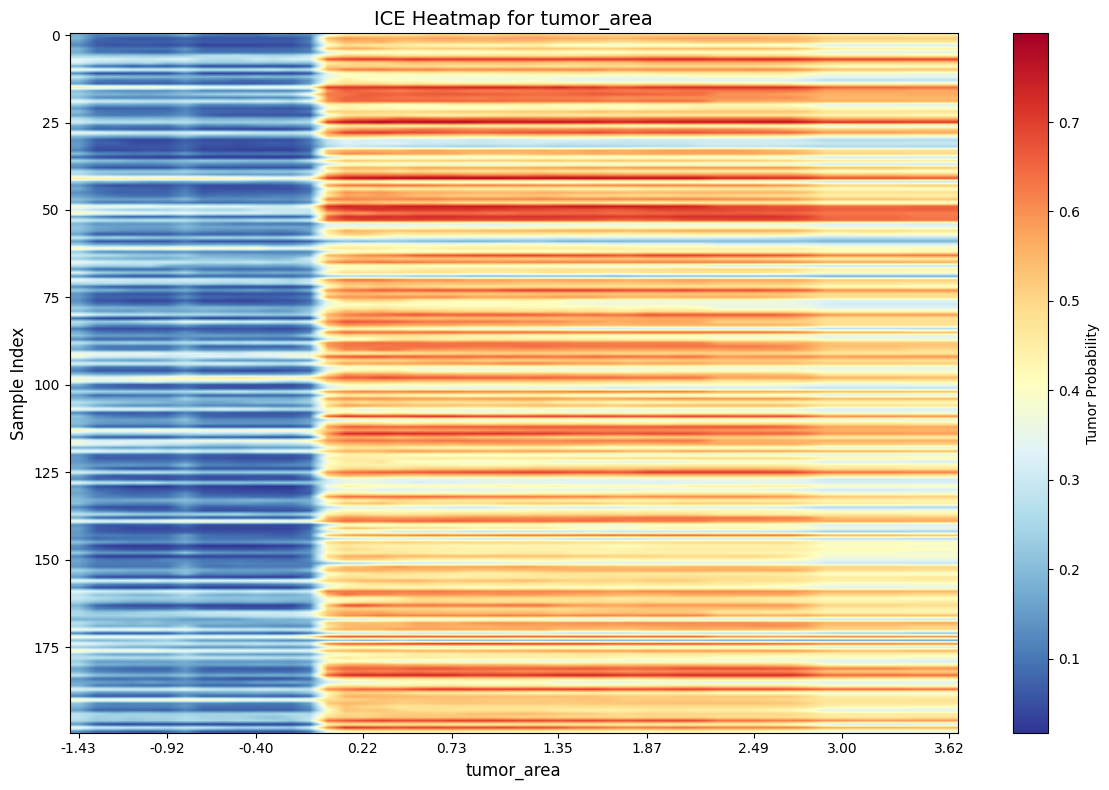


[Reference: ICE Heatmap → tumor_area]
• Each row = one patient/sample, Columns = feature values.
• Color shows tumor probability (blue=low, red=high).
• Horizontal bands → stable predictions across patients.
• Vertical gradients → strong feature effect on tumor risk.
• Uneven patches → possible feature interactions.
----------------------------------------------------------------------------------------------------

Analyzing Feature: intensity_mean


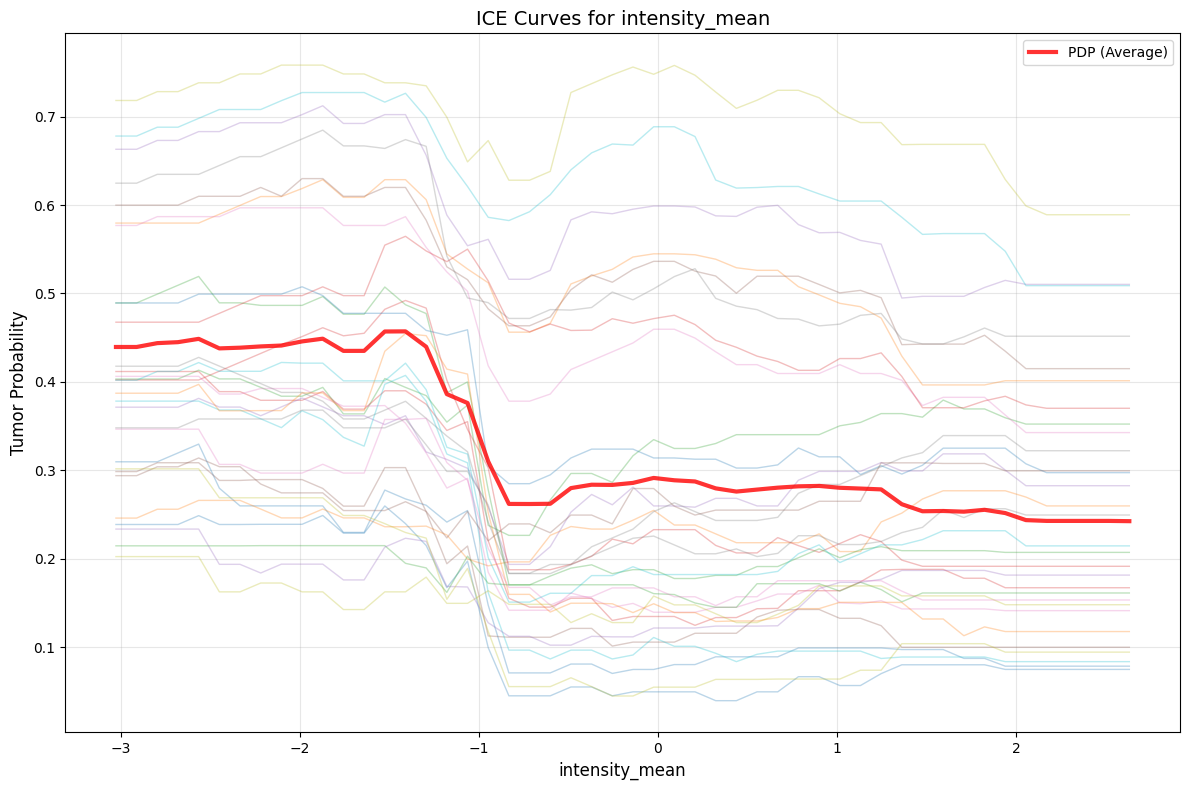


[Reference: ICE Plot → intensity_mean]
• Grey curves = how individual patient predictions change as this feature varies.
• Red PDP line = average population effect.
➡ Varied slopes → Strong feature effect; some patients respond differently.
➡ Samples with sharp rises/drops = more sensitive to this feature.
----------------------------------------------------------------------------------------------------


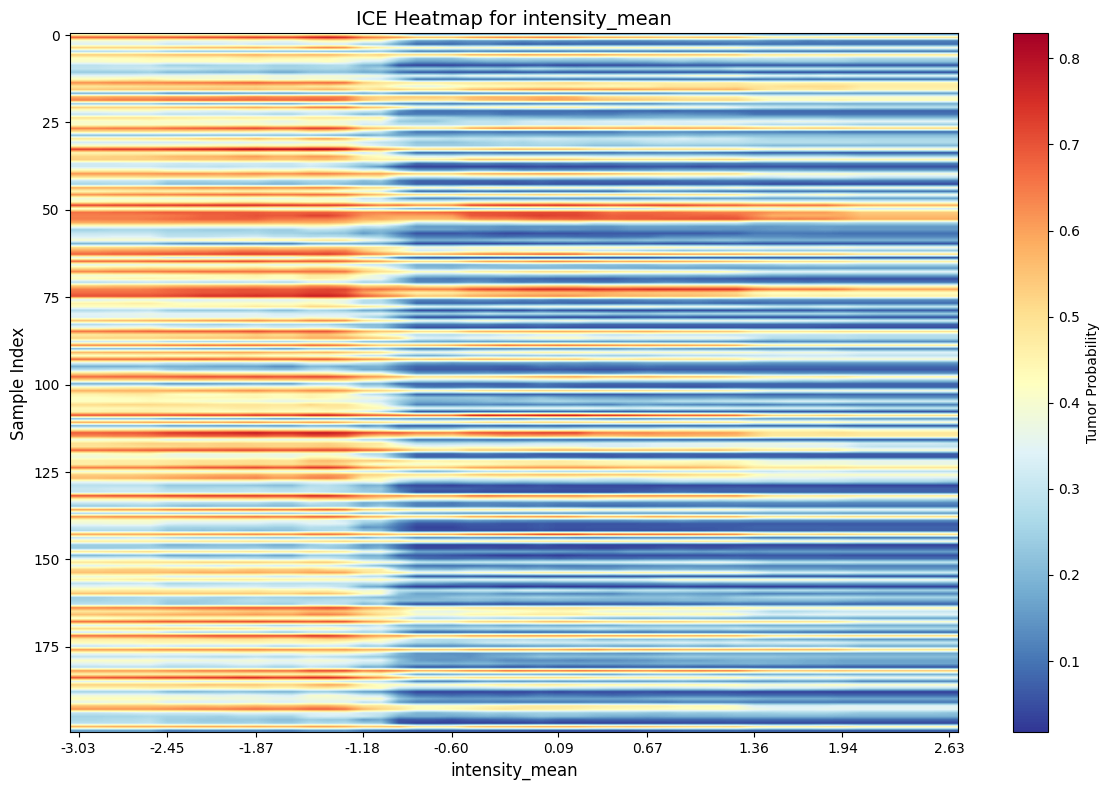


[Reference: ICE Heatmap → intensity_mean]
• Each row = one patient/sample, Columns = feature values.
• Color shows tumor probability (blue=low, red=high).
• Horizontal bands → stable predictions across patients.
• Vertical gradients → strong feature effect on tumor risk.
• Uneven patches → possible feature interactions.
----------------------------------------------------------------------------------------------------

Analyzing Feature: intensity_std


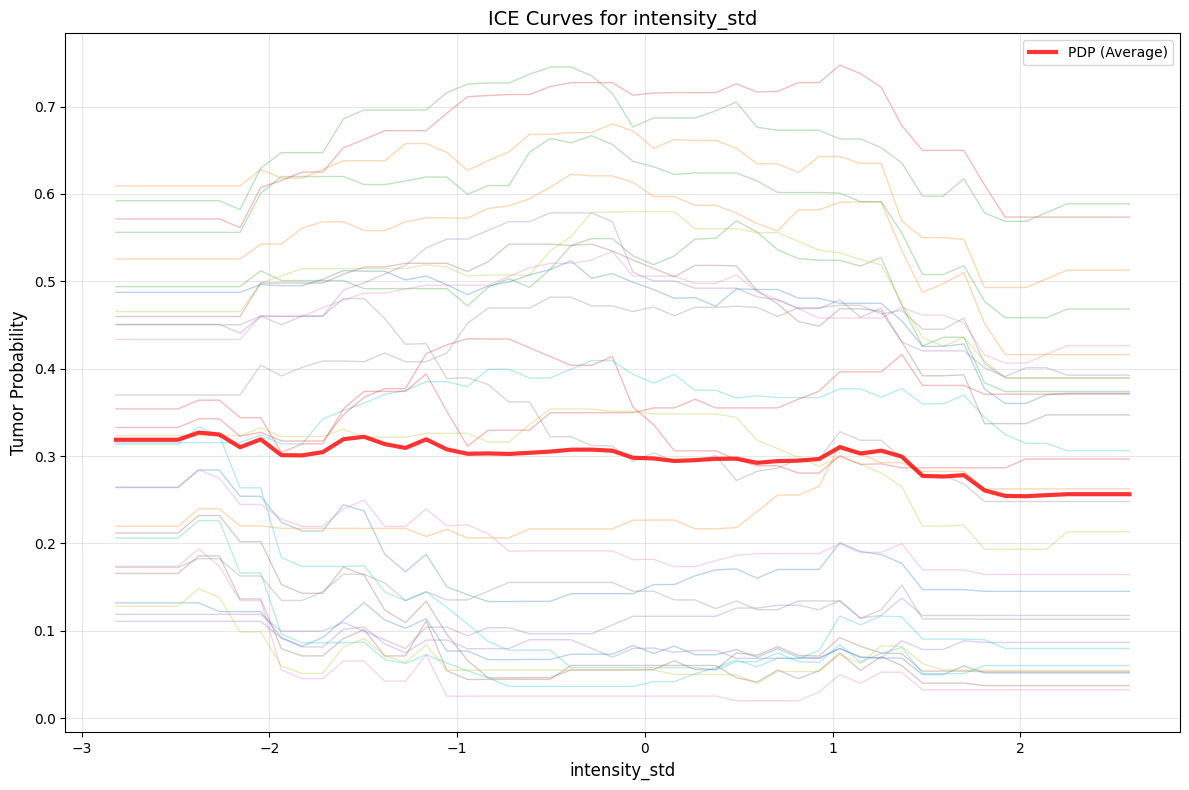


[Reference: ICE Plot → intensity_std]
• Grey curves = how individual patient predictions change as this feature varies.
• Red PDP line = average population effect.
➡ Varied slopes → Strong feature effect; some patients respond differently.
➡ Samples with sharp rises/drops = more sensitive to this feature.
----------------------------------------------------------------------------------------------------


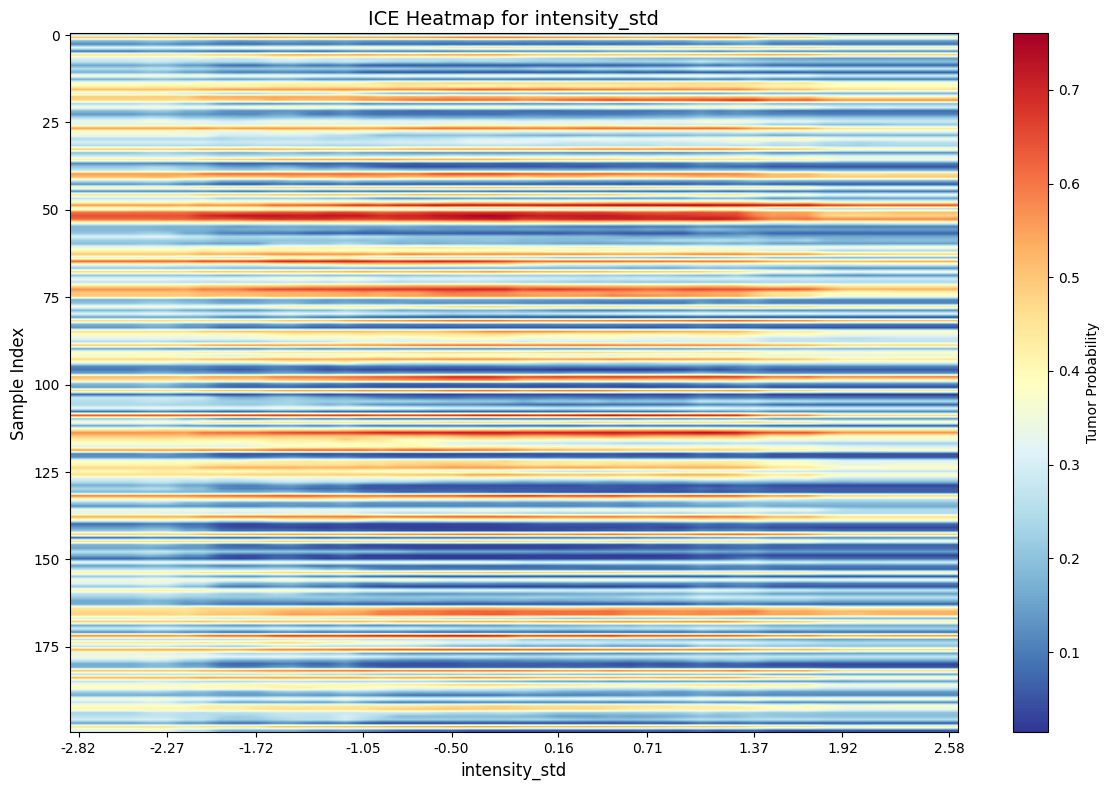


[Reference: ICE Heatmap → intensity_std]
• Each row = one patient/sample, Columns = feature values.
• Color shows tumor probability (blue=low, red=high).
• Horizontal bands → stable predictions across patients.
• Vertical gradients → strong feature effect on tumor risk.
• Uneven patches → possible feature interactions.
----------------------------------------------------------------------------------------------------

Analyzing Feature: contrast_ratio


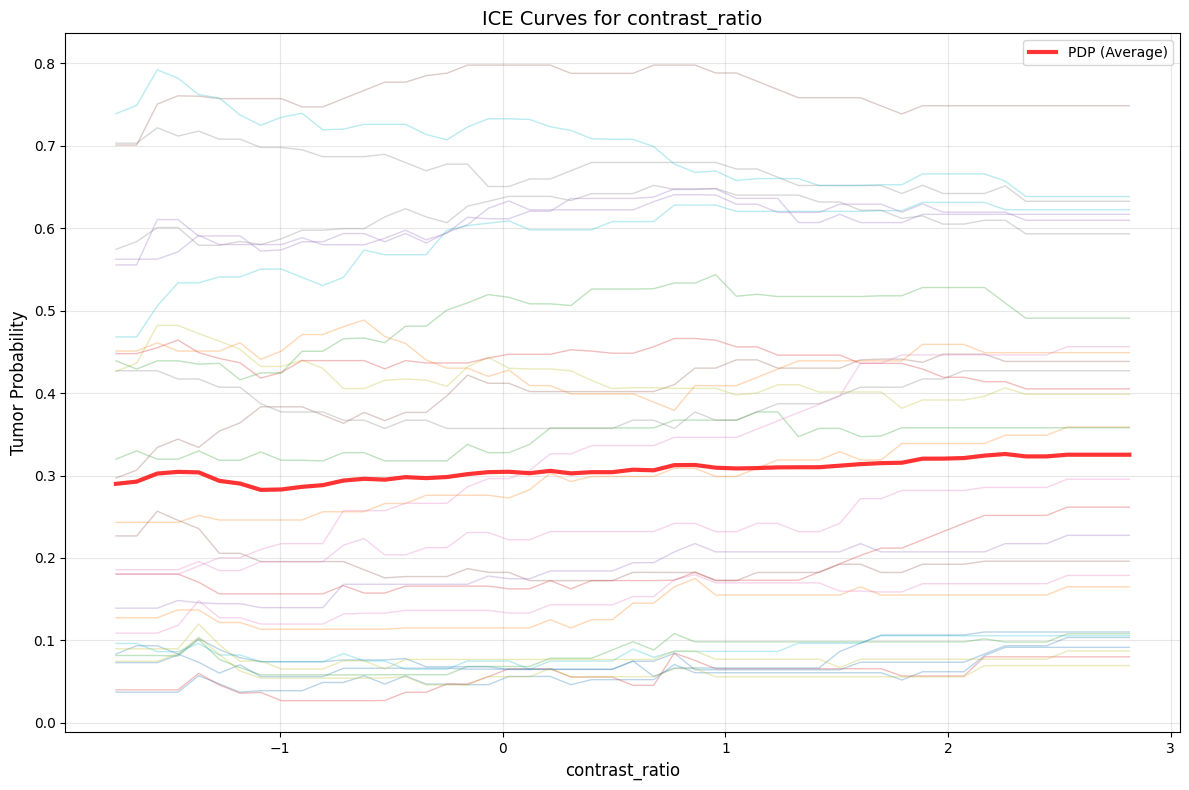


[Reference: ICE Plot → contrast_ratio]
• Grey curves = how individual patient predictions change as this feature varies.
• Red PDP line = average population effect.
➡ Varied slopes → Strong feature effect; some patients respond differently.
➡ Samples with sharp rises/drops = more sensitive to this feature.
----------------------------------------------------------------------------------------------------


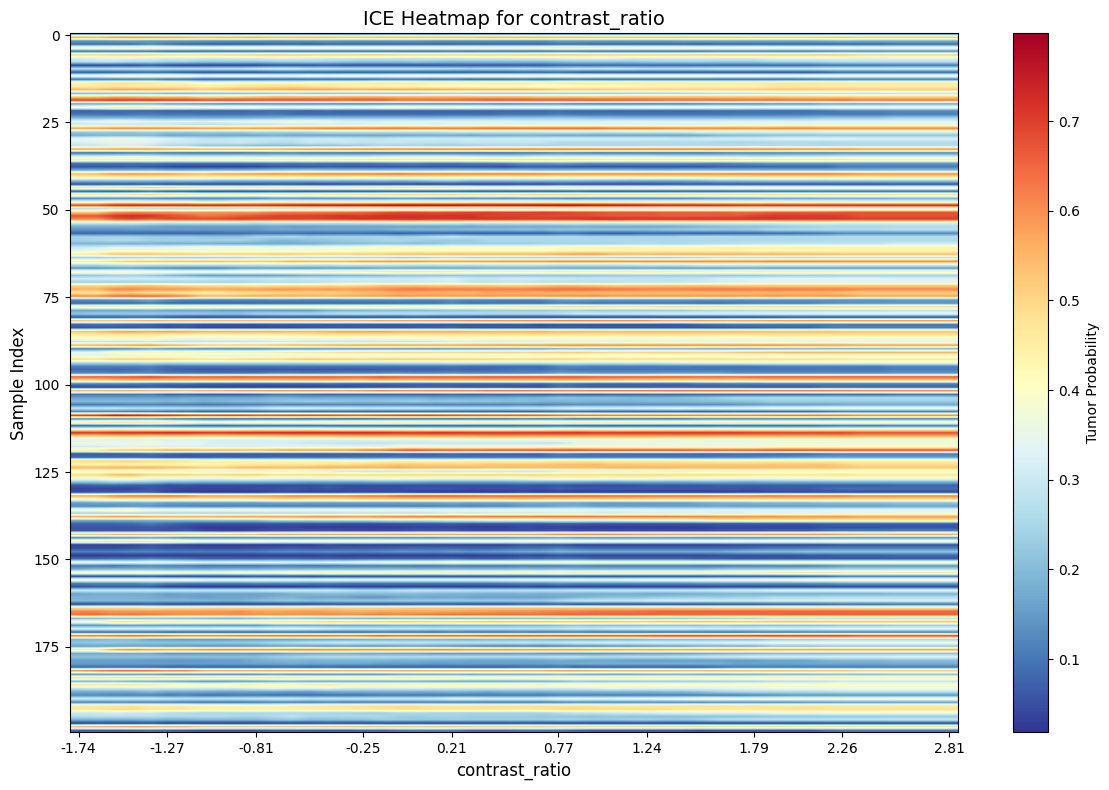


[Reference: ICE Heatmap → contrast_ratio]
• Each row = one patient/sample, Columns = feature values.
• Color shows tumor probability (blue=low, red=high).
• Horizontal bands → stable predictions across patients.
• Vertical gradients → strong feature effect on tumor risk.
• Uneven patches → possible feature interactions.
----------------------------------------------------------------------------------------------------

Analyzing Feature: symmetry_score


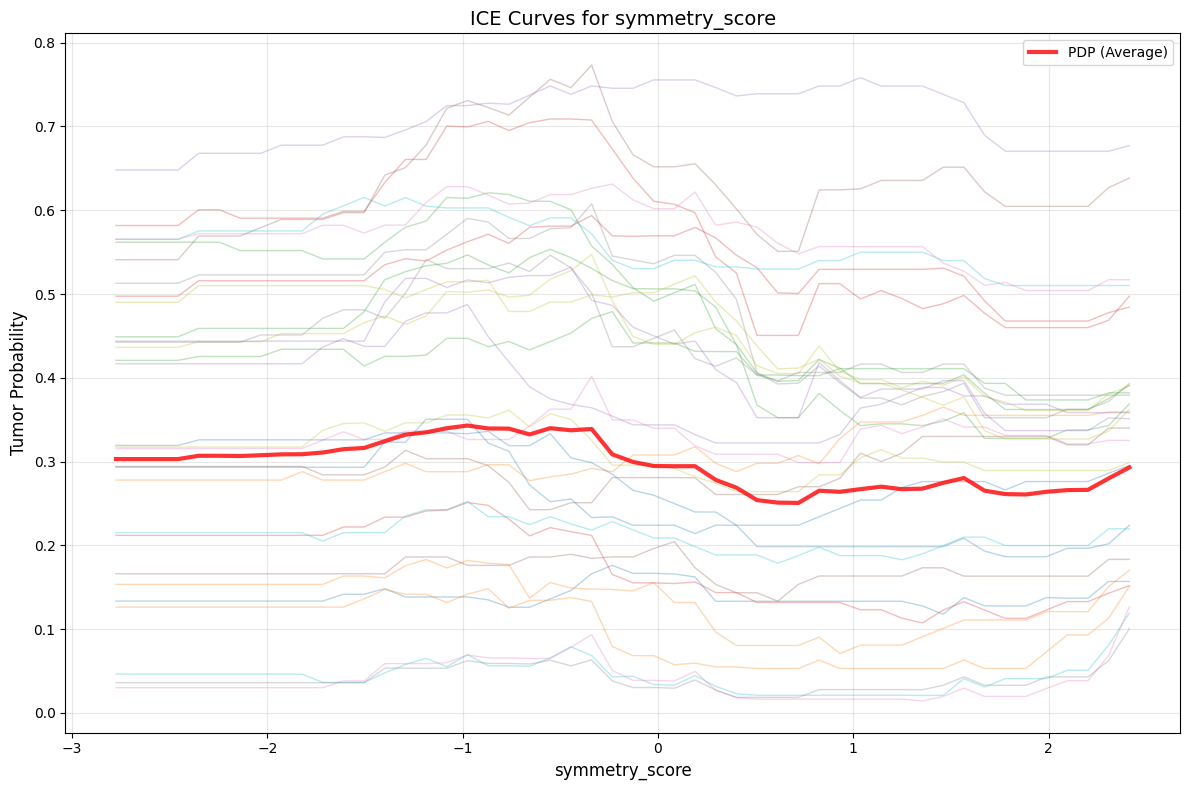


[Reference: ICE Plot → symmetry_score]
• Grey curves = how individual patient predictions change as this feature varies.
• Red PDP line = average population effect.
➡ Varied slopes → Strong feature effect; some patients respond differently.
➡ Samples with sharp rises/drops = more sensitive to this feature.
----------------------------------------------------------------------------------------------------


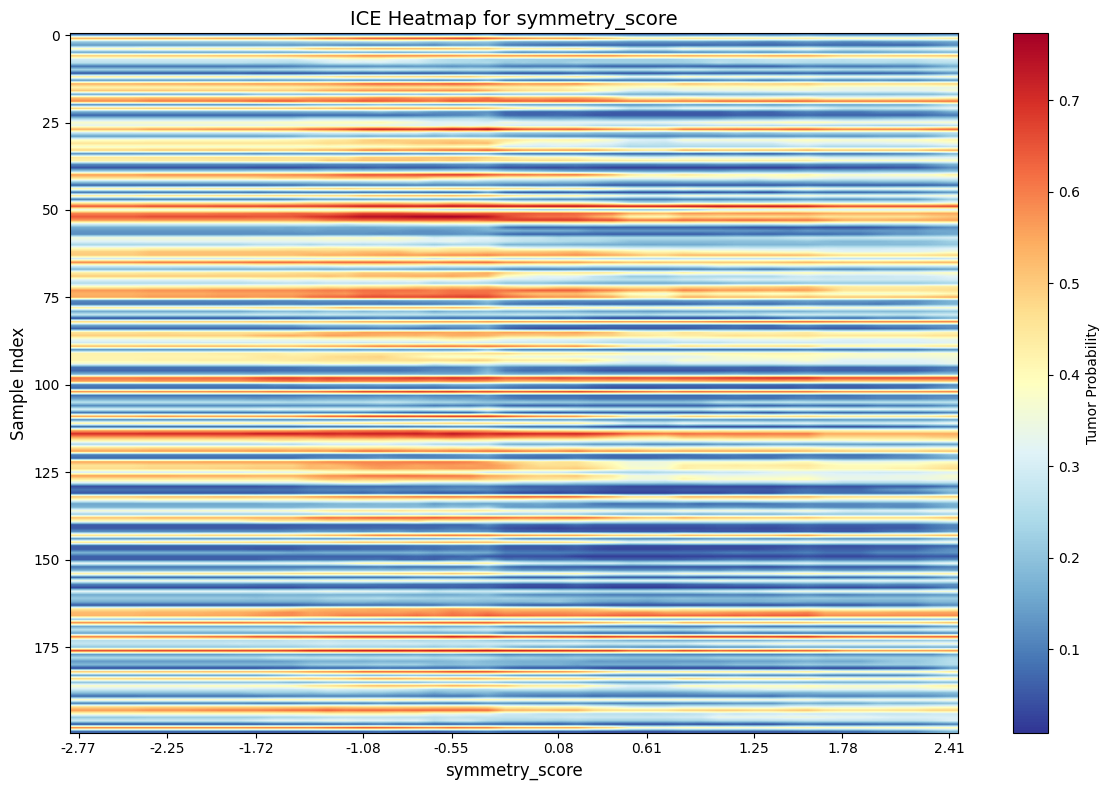


[Reference: ICE Heatmap → symmetry_score]
• Each row = one patient/sample, Columns = feature values.
• Color shows tumor probability (blue=low, red=high).
• Horizontal bands → stable predictions across patients.
• Vertical gradients → strong feature effect on tumor risk.
• Uneven patches → possible feature interactions.
----------------------------------------------------------------------------------------------------

Comparing ICE effects across features...


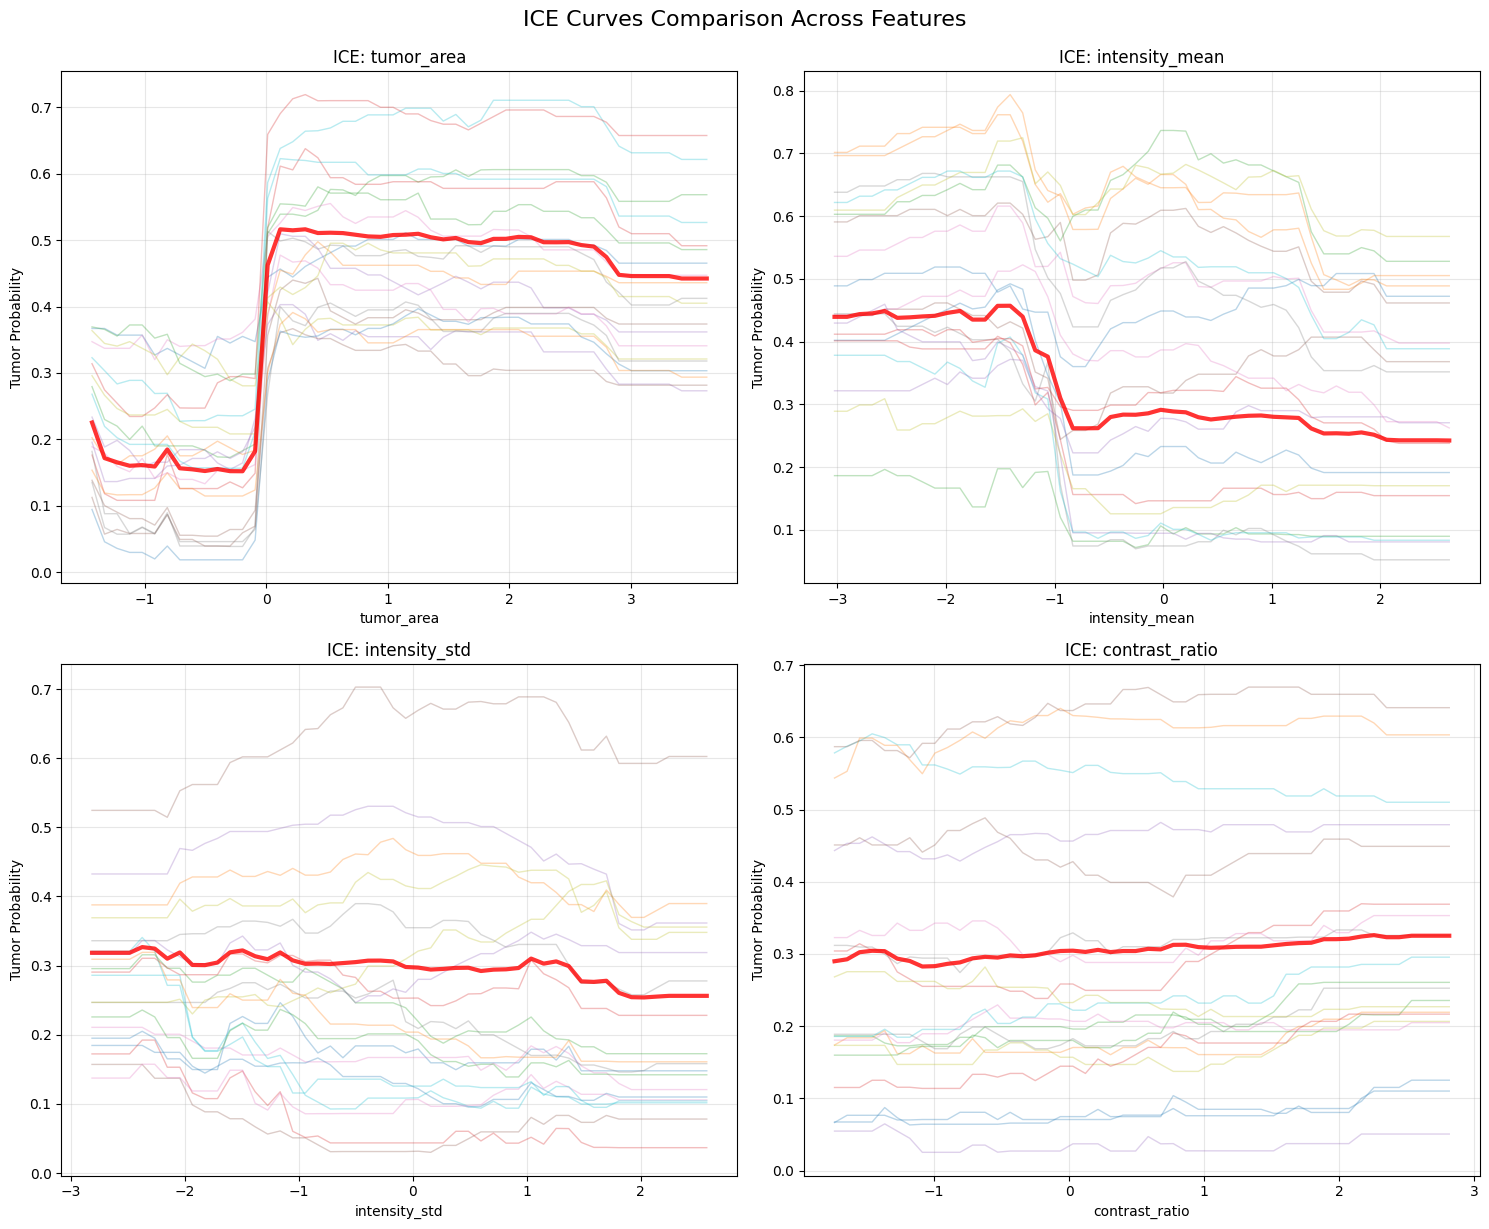


[Reference: Multi-Feature Comparison]
• Features with steep/red PDP = stronger predictors of tumor presence.
• Flat PDP = weak effect.
• Wide spread between ICE curves = higher sample-level variability.
----------------------------------------------------------------------------------------------------

========== FINAL SUMMARY REPORT ==========

Top Features by Importance & ICE Interaction Strength:
        Feature  Importance  InteractionStrength
     tumor_area    0.271776             0.012858
 intensity_mean    0.109288             0.031446
   edge_density    0.106344             0.000000
    circularity    0.077583             0.000000
 symmetry_score    0.074702             0.035612
  intensity_std    0.072510             0.033689
     location_x    0.059911             0.000000
texture_entropy    0.059808             0.000000
     location_y    0.058837             0.000000
 contrast_ratio    0.056849             0.039229


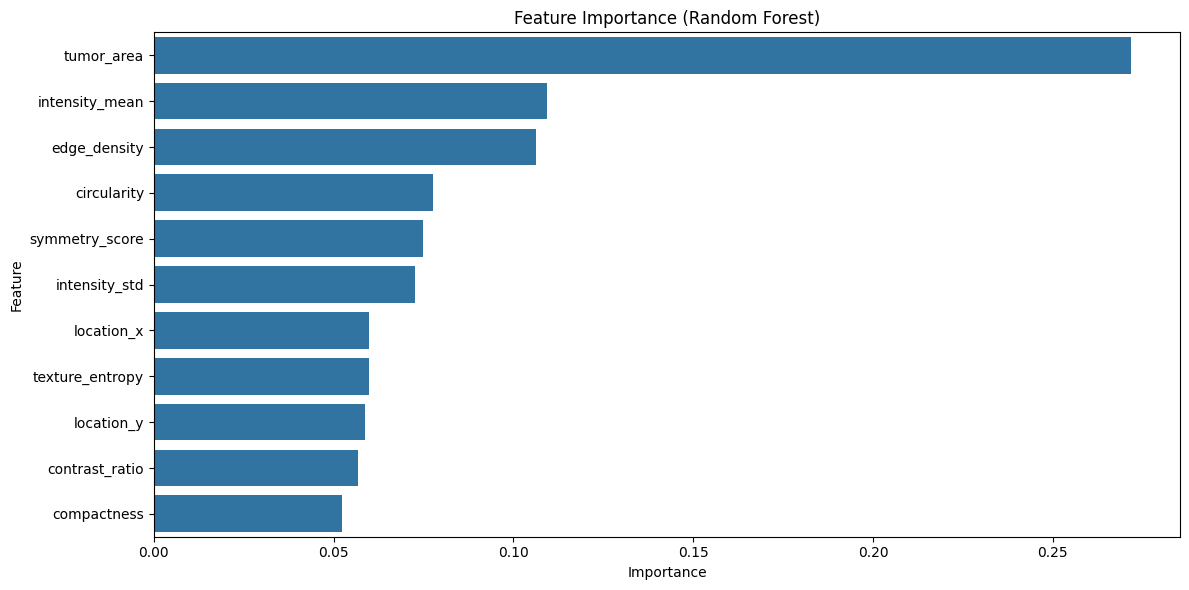

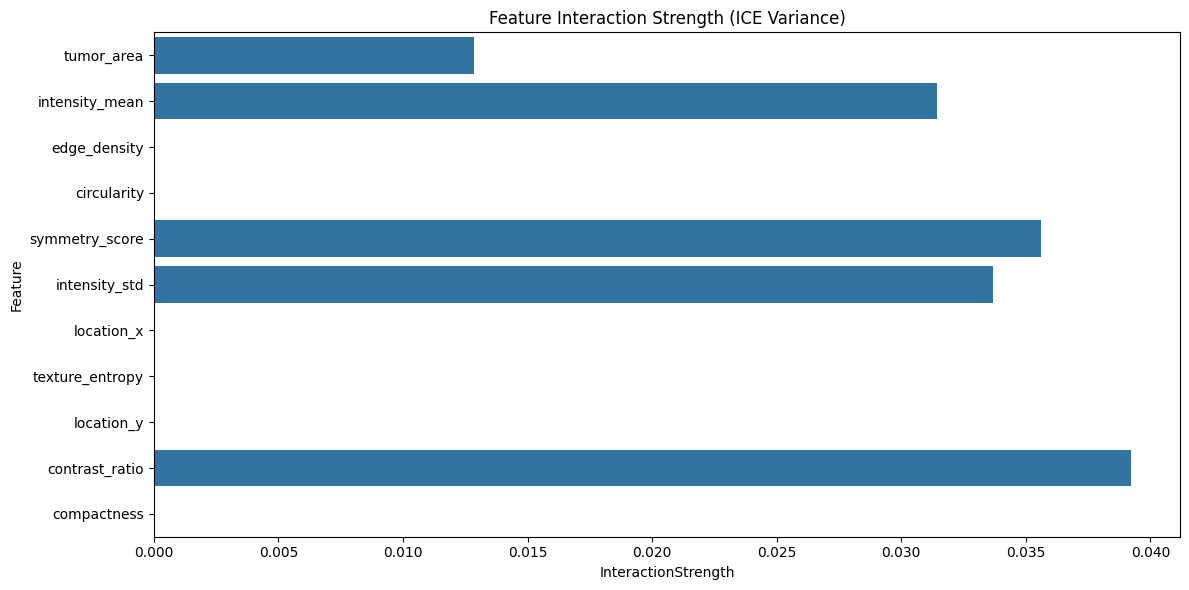


Interpretation:
1. Importance = how much the feature contributes to model splits.
2. Interaction Strength = how differently samples respond to the feature.
3. A feature may be important (high importance) but uniform (low interaction).
4. A feature with high interaction strength → affects patients in heterogeneous ways.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings('ignore')


class ICEExplainer:
    """
    Individual Conditional Expectation (ICE) Explainer
    """

    def __init__(self, model, feature_names=None):
        self.model = model
        self.feature_names = feature_names
        self.ice_data = {}

    def compute_ice(self, X, feature_idx, num_grid_points=50, feature_range=None):
        X_array = X.values if isinstance(X, pd.DataFrame) else X.copy()

        if feature_range is None:
            feature_min = X_array[:, feature_idx].min()
            feature_max = X_array[:, feature_idx].max()
        else:
            feature_min, feature_max = feature_range

        feature_grid = np.linspace(feature_min, feature_max, num_grid_points)
        original_values = X_array[:, feature_idx].copy()
        ice_curves = np.zeros((X_array.shape[0], num_grid_points))

        for i, grid_value in enumerate(feature_grid):
            X_array[:, feature_idx] = grid_value
            if hasattr(self.model, "predict_proba"):
                predictions = self.model.predict_proba(X_array)[:, 1]
            else:
                predictions = self.model.predict(X_array).ravel()
            ice_curves[:, i] = predictions

        X_array[:, feature_idx] = original_values

        self.ice_data[feature_idx] = {
            "feature_grid": feature_grid,
            "ice_curves": ice_curves,
            "feature_name": self.feature_names[feature_idx]
            if self.feature_names
            else f"Feature_{feature_idx}",
        }

        return self.ice_data[feature_idx]

    def plot_ice_curves(self, feature_idx, max_curves=50, alpha=0.3, show_pdp=True, figsize=(12, 8)):
        if feature_idx not in self.ice_data:
            raise ValueError("ICE data not computed. Run compute_ice() first.")

        data = self.ice_data[feature_idx]
        feature_grid = data["feature_grid"]
        ice_curves = data["ice_curves"]
        feature_name = data["feature_name"]

        plt.figure(figsize=figsize)
        n_curves_to_plot = min(max_curves, ice_curves.shape[0])
        indices = np.random.choice(ice_curves.shape[0], n_curves_to_plot, replace=False)

        for idx in indices:
            plt.plot(feature_grid, ice_curves[idx], alpha=alpha, linewidth=1)

        if show_pdp:
            pdp = np.mean(ice_curves, axis=0)
            plt.plot(feature_grid, pdp, color="red", linewidth=3, label="PDP (Average)", alpha=0.8)

        plt.xlabel(feature_name, fontsize=12)
        plt.ylabel("Tumor Probability", fontsize=12)
        plt.title(f"ICE Curves for {feature_name}", fontsize=14)
        plt.grid(True, alpha=0.3)
        if show_pdp:
            plt.legend()
        plt.tight_layout()
        plt.show()

        # Reference Explanation
        print(f"\n[Reference: ICE Plot → {feature_name}]")
        print("• Grey curves = how individual patient predictions change as this feature varies.")
        print("• Red PDP line = average population effect.")
        if np.allclose(np.std(ice_curves, axis=0), 0, atol=1e-3):
            print("➡ Flat curves → This feature has little/no effect on predictions.")
        else:
            print("➡ Varied slopes → Strong feature effect; some patients respond differently.")
        print("➡ Samples with sharp rises/drops = more sensitive to this feature.")
        print("-" * 100)

    def plot_ice_heatmap(self, feature_idx, figsize=(12, 8)):
        if feature_idx not in self.ice_data:
            raise ValueError("ICE data not computed. Run compute_ice() first.")

        data = self.ice_data[feature_idx]
        feature_grid = data["feature_grid"]
        ice_curves = data["ice_curves"]
        feature_name = data["feature_name"]

        plt.figure(figsize=figsize)
        plt.imshow(ice_curves, aspect="auto", cmap="RdYlBu_r", interpolation="bilinear")
        plt.colorbar(label="Tumor Probability")

        n_ticks = 10
        tick_indices = np.linspace(0, len(feature_grid) - 1, n_ticks, dtype=int)
        plt.xticks(tick_indices, [f"{feature_grid[i]:.2f}" for i in tick_indices])
        plt.xlabel(feature_name, fontsize=12)
        plt.ylabel("Sample Index", fontsize=12)
        plt.title(f"ICE Heatmap for {feature_name}", fontsize=14)
        plt.tight_layout()
        plt.show()

        # Reference Explanation
        print(f"\n[Reference: ICE Heatmap → {feature_name}]")
        print("• Each row = one patient/sample, Columns = feature values.")
        print("• Color shows tumor probability (blue=low, red=high).")
        print("• Horizontal bands → stable predictions across patients.")
        print("• Vertical gradients → strong feature effect on tumor risk.")
        print("• Uneven patches → possible feature interactions.")
        print("-" * 100)

    def compute_ice_variance(self, feature_idx):
        if feature_idx not in self.ice_data:
            raise ValueError("ICE data not computed. Run compute_ice() first.")
        ice_curves = self.ice_data[feature_idx]["ice_curves"]
        return np.var(ice_curves, axis=0)

    def identify_feature_interactions(self, feature_idx, variance_threshold=0.01):
        variance = self.compute_ice_variance(feature_idx)
        high_variance_regions = variance > variance_threshold
        return {
            "variance": variance,
            "high_variance_regions": high_variance_regions,
            "interaction_strength": np.mean(variance),
            "feature_name": self.ice_data[feature_idx]["feature_name"],
        }


class BrainTumorICEAnalysis:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.ice_explainer = None
        self.feature_names = None
        self.interaction_summary = {}

    def create_sample_features(self, n_samples=1000):
        np.random.seed(42)
        features = {
            "tumor_area": np.random.gamma(2, 50, n_samples),
            "intensity_mean": np.random.normal(128, 30, n_samples),
            "intensity_std": np.random.normal(25, 8, n_samples),
            "contrast_ratio": np.random.beta(2, 5, n_samples),
            "edge_density": np.random.exponential(0.02, n_samples),
            "symmetry_score": np.random.normal(0.8, 0.15, n_samples),
            "texture_entropy": np.random.normal(4.5, 1.2, n_samples),
            "circularity": np.random.beta(3, 2, n_samples),
            "compactness": np.random.beta(4, 3, n_samples),
            "location_x": np.random.uniform(0, 256, n_samples),
            "location_y": np.random.uniform(0, 256, n_samples),
        }
        df = pd.DataFrame(features)
        tumor_prob = (
            0.3 * (df["tumor_area"] > 100)
            + 0.2 * (df["intensity_mean"] < 100)
            + 0.2 * (df["contrast_ratio"] > 0.6)
            + 0.15 * (df["edge_density"] > 0.03)
            + 0.15 * (df["symmetry_score"] < 0.7)
        )
        tumor_prob += np.random.normal(0, 0.1, n_samples)
        df["has_tumor"] = (tumor_prob + np.random.normal(0, 0.2, n_samples) > 0.4).astype(int)
        self.feature_names = list(features.keys())
        return df

    def train_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        self.model = RandomForestClassifier(
            n_estimators=100, max_depth=10, random_state=42, class_weight="balanced"
        )
        self.model.fit(X_train_scaled, y_train)

        y_pred = self.model.predict(X_test_scaled)
        print("Model Performance:")
        print(classification_report(y_test, y_pred))

        self.ice_explainer = ICEExplainer(self.model, self.feature_names)
        return X_train_scaled, X_test_scaled, y_train, y_test

    def run_ice_analysis(self, X, features_to_analyze=None):
        if features_to_analyze is None:
            features_to_analyze = [0, 1, 2, 3, 4]

        print("Running ICE Analysis...")
        for feature_idx in features_to_analyze:
            print(f"\nAnalyzing Feature: {self.feature_names[feature_idx]}")
            self.ice_explainer.compute_ice(X, feature_idx)
            self.ice_explainer.plot_ice_curves(feature_idx, max_curves=30)
            self.ice_explainer.plot_ice_heatmap(feature_idx)
            interaction = self.ice_explainer.identify_feature_interactions(feature_idx)
            self.interaction_summary[self.feature_names[feature_idx]] = interaction["interaction_strength"]

    def compare_ice_across_features(self, X, features_to_compare=None):
        if features_to_compare is None:
            features_to_compare = [0, 1, 2, 3]

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()

        for i, feature_idx in enumerate(features_to_compare):
            if feature_idx not in self.ice_explainer.ice_data:
                self.ice_explainer.compute_ice(X, feature_idx)

            data = self.ice_explainer.ice_data[feature_idx]
            feature_grid = data["feature_grid"]
            ice_curves = data["ice_curves"]
            feature_name = data["feature_name"]

            ax = axes[i]
            n_curves = min(20, ice_curves.shape[0])
            indices = np.random.choice(ice_curves.shape[0], n_curves, replace=False)

            for idx in indices:
                ax.plot(feature_grid, ice_curves[idx], alpha=0.3, linewidth=1)

            pdp = np.mean(ice_curves, axis=0)
            ax.plot(feature_grid, pdp, color="red", linewidth=3, alpha=0.8)

            ax.set_xlabel(feature_name)
            ax.set_ylabel("Tumor Probability")
            ax.set_title(f"ICE: {feature_name}")
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.suptitle("ICE Curves Comparison Across Features", fontsize=16, y=1.02)
        plt.show()

        print("\n[Reference: Multi-Feature Comparison]")
        print("• Features with steep/red PDP = stronger predictors of tumor presence.")
        print("• Flat PDP = weak effect.")
        print("• Wide spread between ICE curves = higher sample-level variability.")
        print("-" * 100)

    def generate_summary_report(self):
        print("\n========== FINAL SUMMARY REPORT ==========")
        feature_importance = self.model.feature_importances_
        importance_df = pd.DataFrame(
            {"Feature": self.feature_names, "Importance": feature_importance,
             "InteractionStrength": [self.interaction_summary.get(f, 0) for f in self.feature_names]}
        ).sort_values("Importance", ascending=False)

        print("\nTop Features by Importance & ICE Interaction Strength:")
        print(importance_df.head(10).to_string(index=False))

        plt.figure(figsize=(12, 6))
        sns.barplot(data=importance_df, x="Importance", y="Feature")
        plt.title("Feature Importance (Random Forest)")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 6))
        sns.barplot(data=importance_df, x="InteractionStrength", y="Feature")
        plt.title("Feature Interaction Strength (ICE Variance)")
        plt.tight_layout()
        plt.show()

        print("\nInterpretation:")
        print("1. Importance = how much the feature contributes to model splits.")
        print("2. Interaction Strength = how differently samples respond to the feature.")
        print("3. A feature may be important (high importance) but uniform (low interaction).")
        print("4. A feature with high interaction strength → affects patients in heterogeneous ways.")
        print("===========================================")


def main():
    print("Brain Tumor Detection - ICE Analysis Demo")
    print("=" * 50)

    analysis = BrainTumorICEAnalysis()
    print("Creating sample features...")
    df = analysis.create_sample_features(n_samples=1000)
    print(f"Dataset shape: {df.shape}")
    print(f"Tumor cases: {df['has_tumor'].sum()}")
    print(f"Non-tumor cases: {len(df) - df['has_tumor'].sum()}")

    X = df.drop("has_tumor", axis=1)
    y = df["has_tumor"]

    print("\nTraining Random Forest model...")
    X_train, X_test, y_train, y_test = analysis.train_model(X, y)

    print("\nRunning ICE Analysis on key features...")
    analysis.run_ice_analysis(X_test, features_to_analyze=[0, 1, 2, 3, 5])

    print("\nComparing ICE effects across features...")
    analysis.compare_ice_across_features(X_test)

    analysis.generate_summary_report()


if __name__ == "__main__":
    main()


In [ ]:
# =========================================================
# LIME + EfficientNet + RandomForest
# Save model to .h5 (wrapper) and .joblib
# =========================================================

# 0) Install
!pip install -U lime scikit-image

# 1) Imports
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import PIL

from lime import lime_image
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# =========================================================
# 2) Configuration
# =========================================================
BASE_PATH = Path("/content/drive/MyDrive/Brain tumor Detection")
IMAGE_EXTENSIONS = (".jpg", ".jpeg", ".png")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
LIMIT = None
RF_N_ESTIMATORS = 150
RANDOM_STATE = 42

SAVE_EXPLANATION_DIR = BASE_PATH / "lime_explanations"
SAVE_EXPLANATION_DIR.mkdir(parents=True, exist_ok=True)

# =========================================================
# 3) Load image as array
# =========================================================
def load_image_as_array(path, target_size=IMG_SIZE):
    img = kimage.load_img(path, target_size=target_size)
    arr = kimage.img_to_array(img).astype(np.uint8)
    return arr

# =========================================================
# 4) Scan dataset
# =========================================================
def build_image_index(base_path: Path, exts=IMAGE_EXTENSIONS, limit=None):
    rows = []
    for root, _, files in os.walk(base_path):
        for f in files:
            if f.lower().endswith(exts):
                full = Path(root) / f
                label = Path(root).name
                rows.append({"path": str(full), "label": label})

    df = pd.DataFrame(rows)
    if df.empty:
        raise FileNotFoundError("No images found under dataset path.")

    if limit:
        df = df.sample(n=min(limit, len(df)), random_state=RANDOM_STATE).reset_index(drop=True)

    return df

# =========================================================
# 5) Feature extractor
# =========================================================
def build_feature_extractor():
    base = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg",
                          input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    return base

def extract_features_for_paths(paths, extractor, batch_size=BATCH_SIZE):
    arrays = []
    valid_paths = []

    for p in paths:
        try:
            img = kimage.load_img(p, target_size=IMG_SIZE)
            arr = kimage.img_to_array(img)
            arrays.append(arr)
            valid_paths.append(p)
        except:
            print("Skipping image:", p)

    arrays = np.array(arrays, dtype=np.float32)
    arrays = preprocess_input(arrays)

    feats = extractor.predict(arrays, batch_size=batch_size, verbose=1)
    return feats, valid_paths

# =========================================================
# 6) Main pipeline
# =========================================================
print("Building image index...")
df_idx = build_image_index(BASE_PATH, limit=LIMIT)
print("Found:", len(df_idx))

print("Building EfficientNetB0 feature extractor...")
extractor = build_feature_extractor()

print("Extracting features...")
features, valid_paths = extract_features_for_paths(df_idx["path"].tolist(), extractor)
print("Feature shape:", features.shape)

df_valid = df_idx[df_idx["path"].isin(valid_paths)].reset_index(drop=True)
if len(df_valid) != features.shape[0]:
    df_valid = pd.DataFrame({"path": valid_paths})
    df_valid["label"] = df_valid["path"].apply(lambda p: Path(p).parent.name)

# =========================================================
# 7) RandomForest Training
# =========================================================
X = features
y = df_valid["label"].values

print("Training RandomForest...")
rf = RandomForestClassifier(n_estimators=RF_N_ESTIMATORS, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X, y)
print("Classes:", rf.classes_)

# Save RF model
rf_path = SAVE_EXPLANATION_DIR / "rf_on_effnet_features.joblib"
joblib.dump(rf, rf_path)
print("Saved RF model to:", rf_path)

# =========================================================
# 8) Save EfficientNet as .h5
# =========================================================
extractor_h5_path = SAVE_EXPLANATION_DIR / "efficientnet_feature_extractor.h5"
extractor.save(str(extractor_h5_path))
print("Saved EfficientNet feature extractor to:", extractor_h5_path)

# =========================================================
# 9) Build Wrapper Keras Model to Save Full Pipeline as .h5
# =========================================================
class FeatureRFModel(tf.keras.Model):
    def __init__(self, extractor, rf_model):
        super().__init__()
        self.extractor = extractor
        self.rf = rf_model

    def call(self, inputs):
        x = tf.keras.applications.efficientnet.preprocess_input(inputs)
        feats = self.extractor(x, training=False)
        preds = tf.numpy_function(self.rf.predict_proba, [feats], tf.float32)
        return preds

# Load RF
rf_loaded = joblib.load(rf_path)

# Create wrapper model
wrapper = FeatureRFModel(extractor, rf_loaded)

# Build model with dummy input
dummy_input = tf.zeros((1, 224, 224, 3))
wrapper(dummy_input)

# Save wrapper
pipeline_h5_path = SAVE_EXPLANATION_DIR / "brain_tumor_pipeline.h5"
wrapper.save(str(pipeline_h5_path))
print("Saved FULL pipeline (.h5) to:", pipeline_h5_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=63aa641d5caf223279ace904edbc0750b78d4a35de7591c5e20a51908afe6e70
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
Building image index...
Found: 3271
Building EfficientNetB0 feature extractor...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracting features...
Skipping image: /content/drive/MyDrive/Brain tumor Detection/Testing/glioma_tumor/image(14).jpg
103/103 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step
Feature shape: (3270, 1280)
Training RandomForest...
Classes: ['Brain tumor Detection' 'Outputs' 'glioma_tumor' 'lime_explanations'
 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


Saved RF model to: /content/drive/MyDrive/Brain tumor Detection/lime_explanations/rf_on_effnet_features.joblib
Saved EfficientNet feature extractor to: /content/drive/MyDrive/Brain tumor Detection/lime_explanations/efficientnet_feature_extractor.h5


Saved FULL pipeline (.h5) to: /content/drive/MyDrive/Brain tumor Detection/lime_explanations/brain_tumor_pipeline.h5
